# **1.Environment Configuration**
----------

In [73]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation
import warnings

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning
import keras.layers as L             # for easy NN layer access

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error   # for evaluating regression models

# Tabular Data Display
from tabulate import tabulate                   # for creating nicely formatted tables

# Ignore Warnings
warnings.filterwarnings('ignore')               # suppresses unnecessary warnings


In [3]:
pd.set_option('display.max_columns', None)
global df

# **2. Data processing**
-------

In [4]:
df = pd.read_csv('drinking_water_potability.csv')
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

------------
### Data cleaning

Remove nan data from our data set

In [5]:
import impute_data

In [6]:
impute_data.count__nulls(df)

column_name  missing_values
0               ph             491
1         Hardness               0
2           Solids               0
3      Chloramines               0
4          Sulfate             781
5     Conductivity               0
6   Organic_carbon               0
7  Trihalomethanes             162
8        Turbidity               0
9       Potability               0

In [7]:
df = impute_data.remove__nulls(df)
impute_data.count__nulls(df)

column_name  missing_values
0               ph               0
1         Hardness               0
2           Solids               0
3      Chloramines               0
4          Sulfate               0
5     Conductivity               0
6   Organic_carbon               0
7  Trihalomethanes               0
8        Turbidity               0
9       Potability               0

### Observation of the clean data
----

In [8]:
df.head(5)

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   
7   8.635849  203.361523  13672.09176     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0

In [9]:
features = df.drop('Potability', axis=1)
labels = df['Potability']


In [10]:
negative = np.sum(labels == 0)
positive = np.sum(labels == 1)
difference = abs(negative - positive)
print(f'Negative: {negative}\nPositive: {positive}\nDiference: {difference}')

Negative: 1200
Positive: 811
Diference: 389


------
# **3. Feature Space and the Curse of Dimensionality**

In [11]:
features_space = features.iloc[:, :2]
labels_space = labels

In [12]:
random_values = features_space.sample(n=10)
X_sample = random_values.iloc[:, 0]
Y_sample = random_values.iloc[:, 1]
Z_sample = labels_space[random_values.index]

In [13]:
for x_val, y_val, z_val in zip(X_sample, Y_sample, Z_sample):
    print(f'X: {x_val}, Y: {y_val}, Z: {z_val}')

X: 8.129585514, Y: 177.8989666, Z: 0
X: 7.296908882, Y: 149.0794958, Z: 1
X: 9.267187531, Y: 198.6143947, Z: 0
X: 5.30414266, Y: 160.9683582, Z: 0
X: 8.490571562, Y: 204.1236484, Z: 0
X: 8.189213851, Y: 156.3284648, Z: 1
X: 6.257085791, Y: 180.4062106, Z: 0
X: 5.094164361, Y: 223.1671255, Z: 1
X: 7.998090254, Y: 241.0002765, Z: 1
X: 7.708109989, Y: 188.9978501, Z: 1


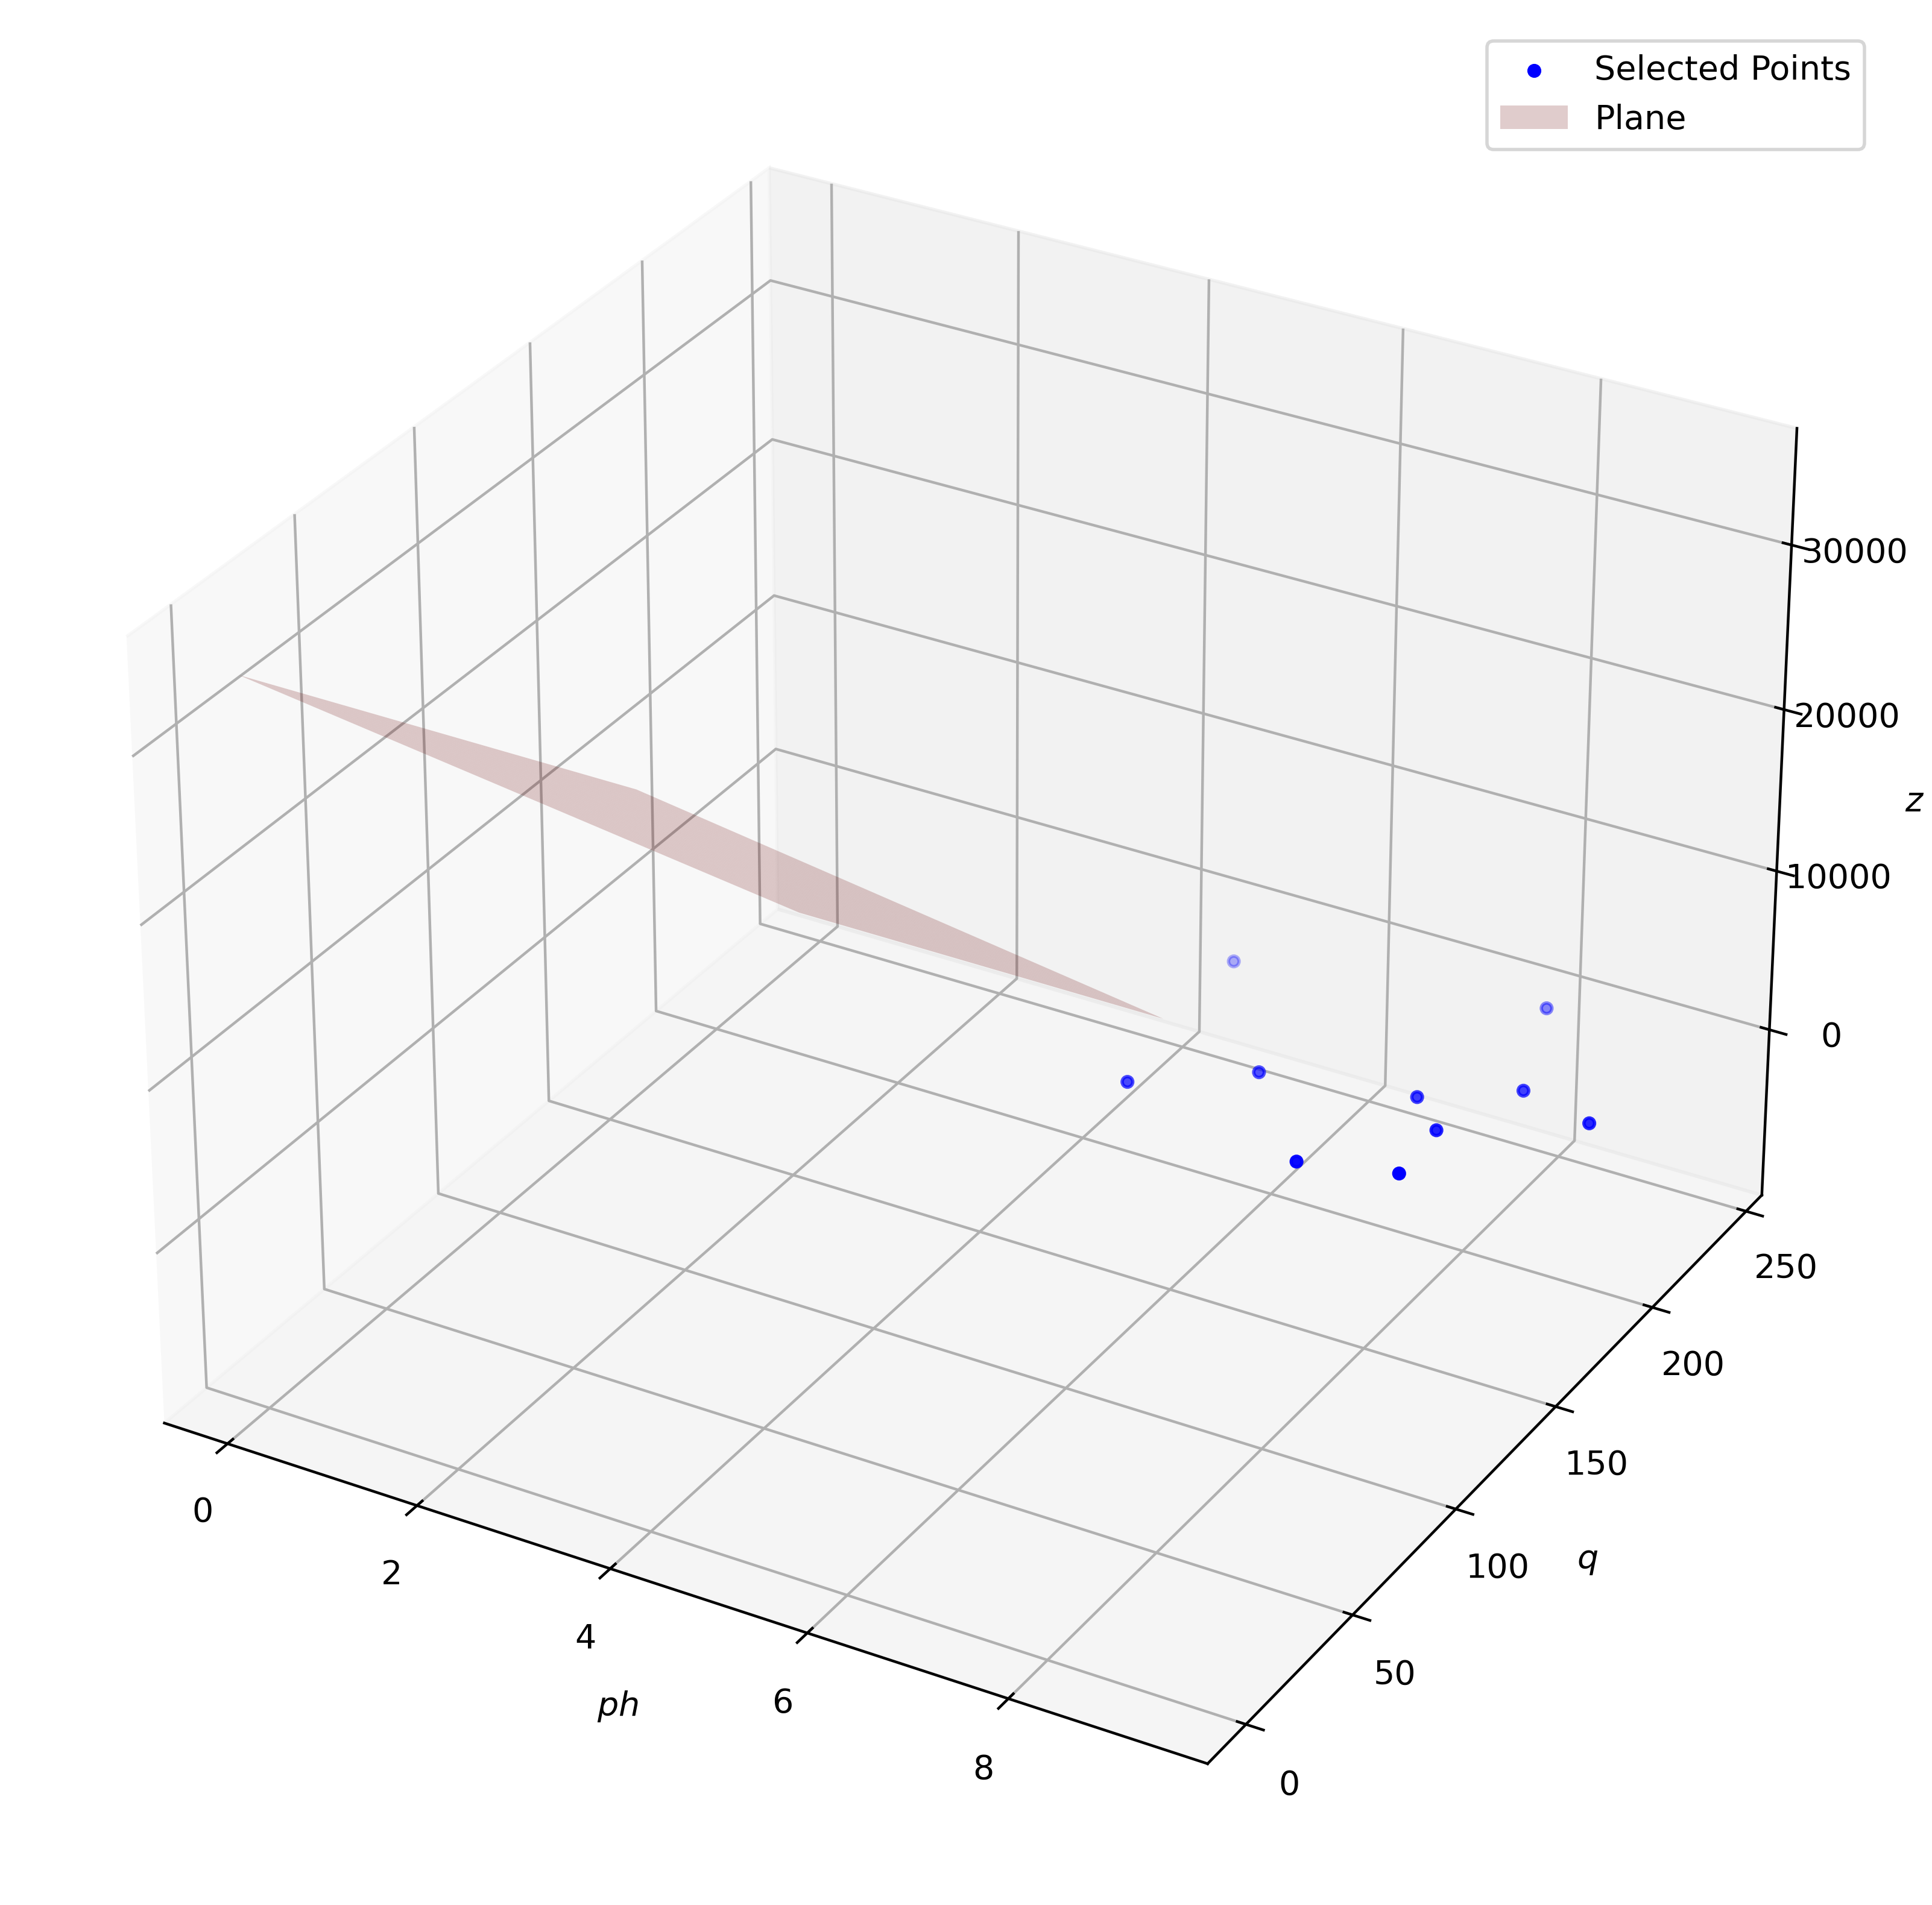

In [14]:
fig = plt.figure(figsize=(10, 10), dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample, Y_sample, Z_sample, s=10, c='blue', marker='o', label='Selected Points')

# no se que como se defina esto
point = np.array([7, 196, 1])
normal = np.array([6, 173, 1])
d = -point.dot(normal)

xx, yy = np.meshgrid(range(int(X_sample.min())), range(int(Y_sample.max())))
z_plane = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

ax.plot_surface(xx, yy, z_plane, alpha=0.2, color='red', label='Plane')

ax.set_xlabel('$ph$')
ax.set_ylabel('$q$')
ax.set_zlabel('$z$')

ax.legend()

plt.show()

from IPython.display import HTML, display

texto = d

display(HTML(f"{texto}"))

--------
## **Hypercubes**
---------

### Hyper-cubes 1 dimension (Using ph)
-------

In [15]:
random_values = features.sample(n=100)
features_d1 = random_values.iloc[:, 0]
labels_d1 = labels[random_values.index]

In [16]:
labels_hy1 = np.array(['blue' if i == 1 else 'red' for i in labels_d1])
red = np.sum(labels_hy1 == 'red')
blue = np.sum(labels_hy1 == 'blue')
print(f'Red: {red}\nBlue: {blue}')

Red: 70
Blue: 30


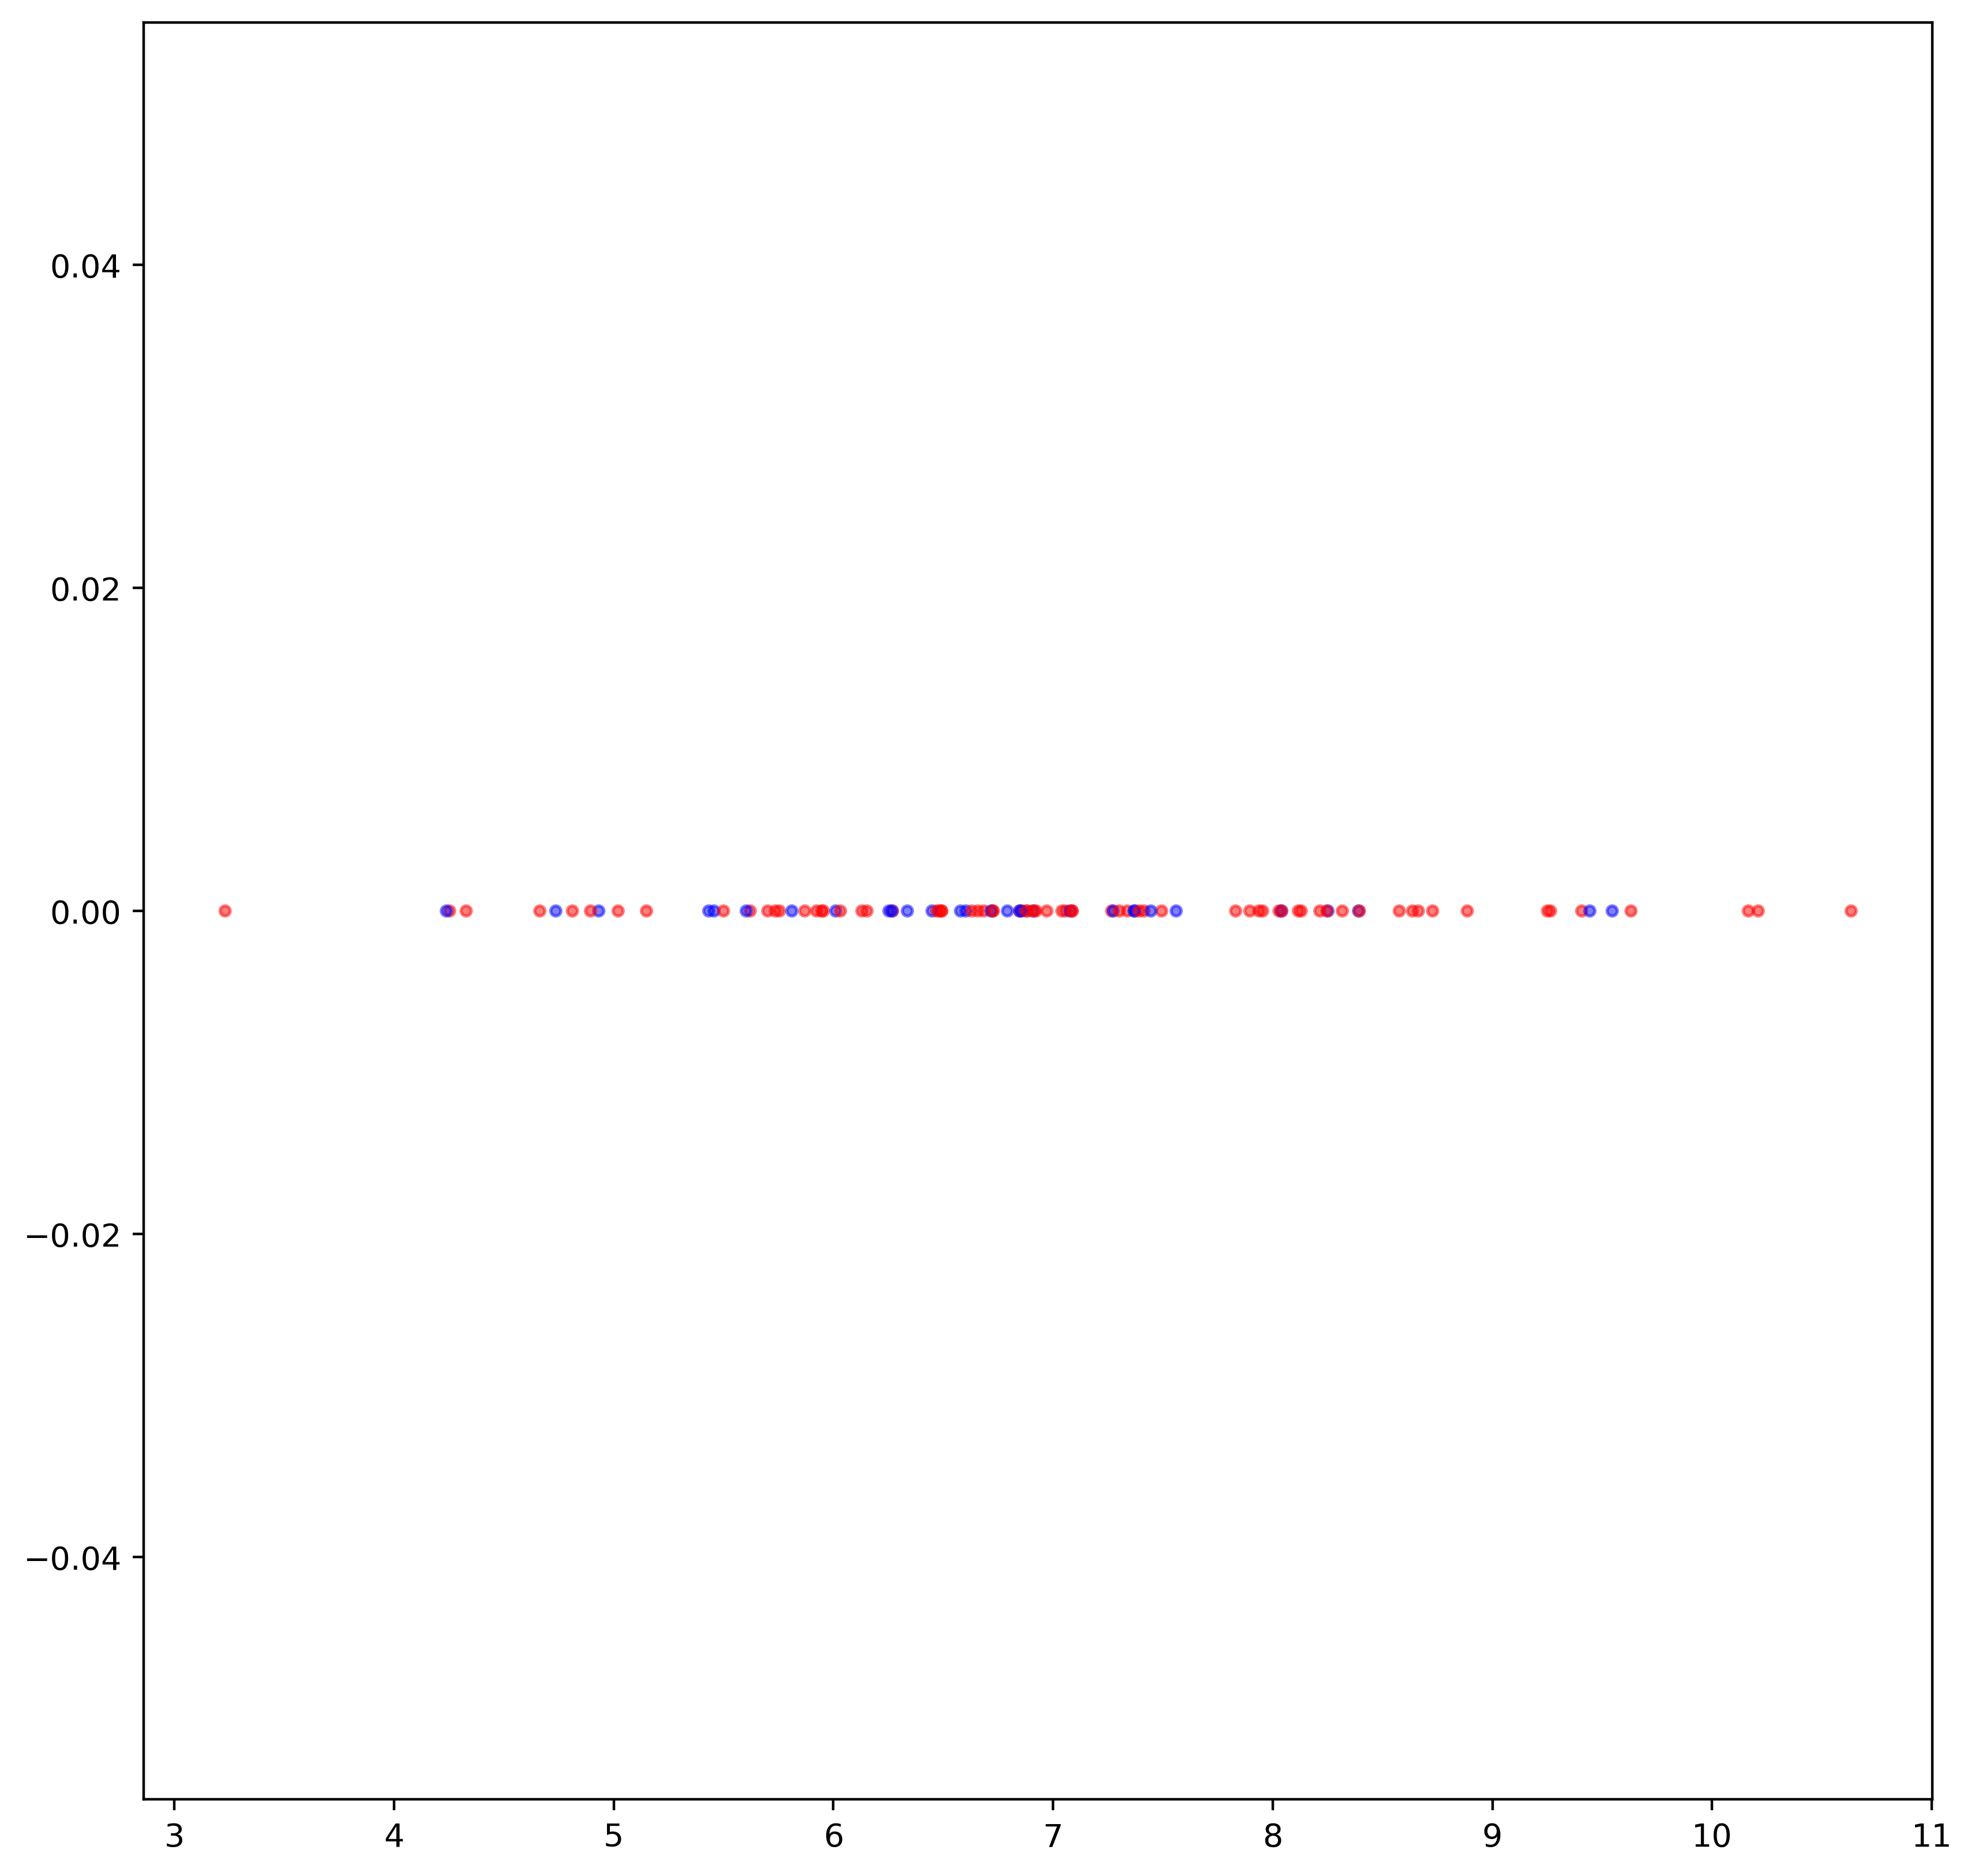

In [17]:
plt.figure(figsize=(10, 10), dpi=400)
plt.scatter(features_d1, np.zeros_like(features_d1), 
            c=labels_hy1, s=10, alpha=0.5, label='Selected Points') 
plt.show()


### Hyper-cubes 2 dimension (Using ph, hardness)
-------

In [18]:
random_values = features.sample(n=2000)
features_d2 = random_values.iloc[:, :2]
labels_d2 = labels[random_values.index]

In [19]:
labels_hy2 = np.array(['blue' if i == 1 else 'red' for i in labels_d2])

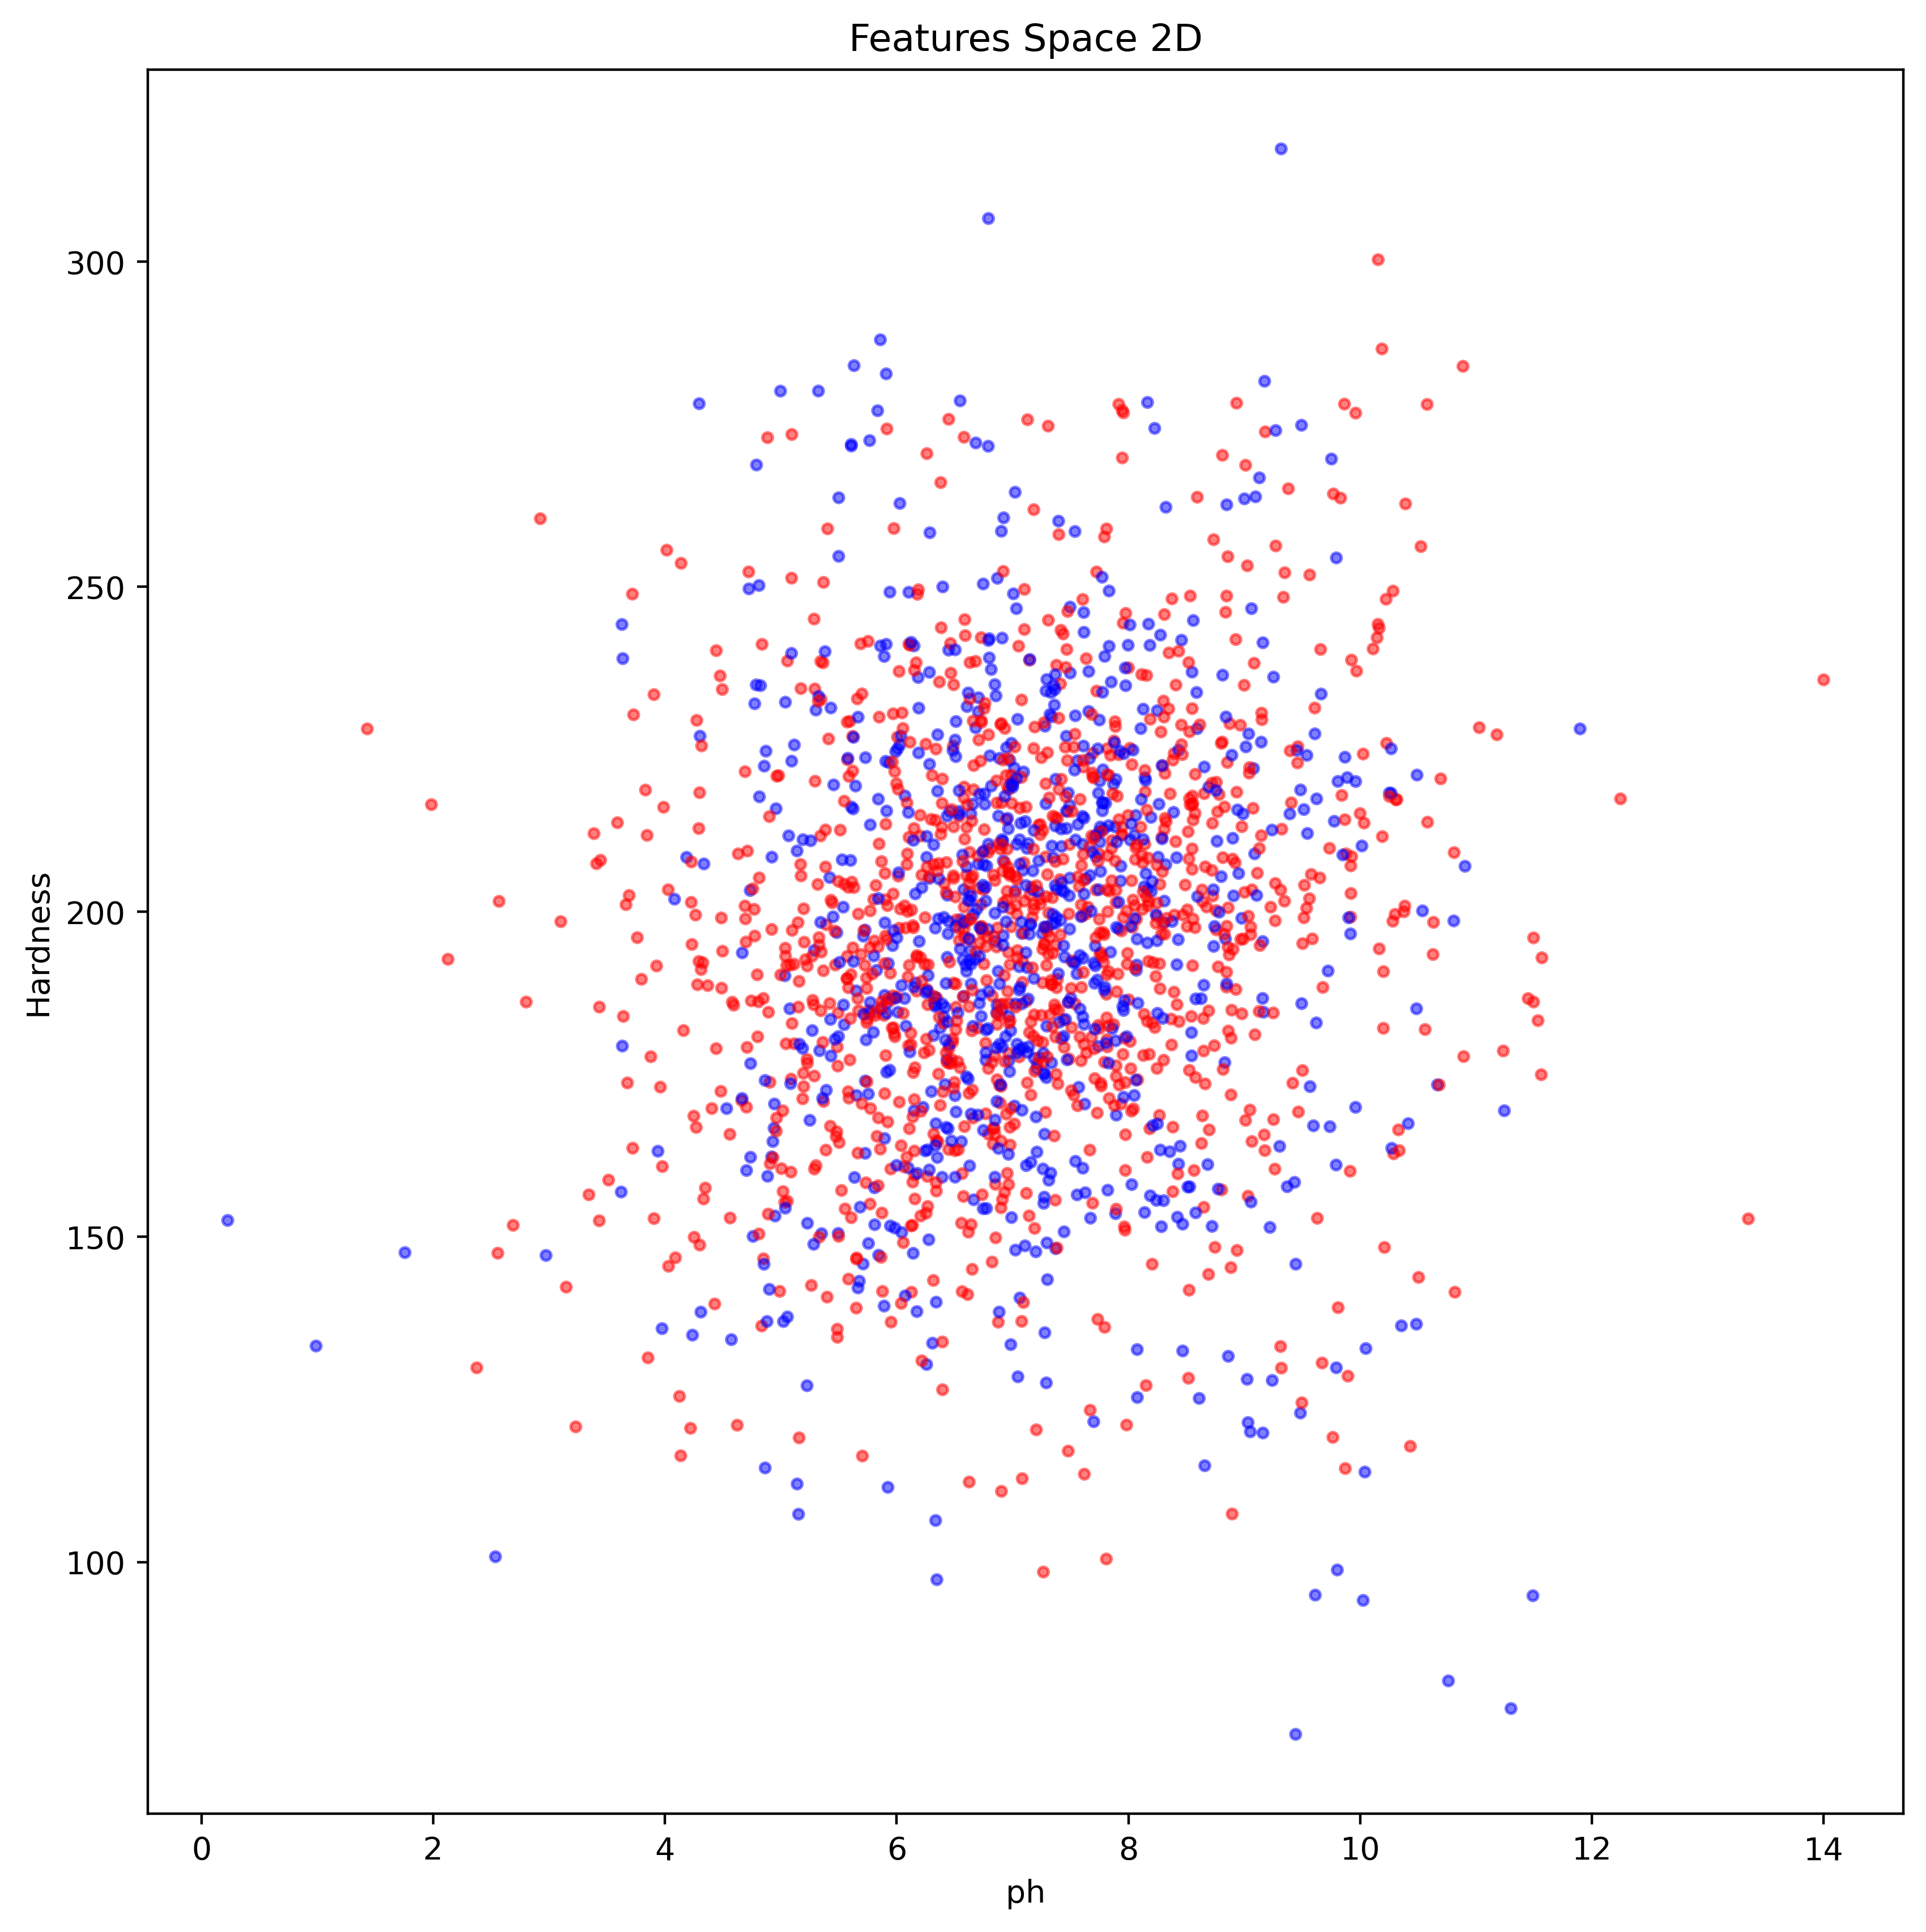

In [20]:
plt.figure(figsize=(10, 10), dpi=400)
plt.scatter(features_d2.iloc[:, 0], features_d2.iloc[:, 1], 
            c=labels_hy2, s=10, alpha=0.5, label='Selected Points')
plt.title('Features Space 2D')
plt.xlabel(features_d2.columns[0])
plt.ylabel(features_d2.columns[1])
plt.show()

### Hypercube 3 dimensions (Using ph, hardness, solid)
------

In [21]:
random_values = features.sample(n=2000)
features_d3 = random_values.iloc[:, :3]
labels_d3 = labels[random_values.index]
features_d3.head(5)

ph    Hardness       Solids
795   10.268415  225.074218  14694.42062
2026   7.078361  198.412447  16648.60057
1163   5.728824  197.191839  12932.59039
2569   4.624304  121.036319  22981.74941
2575   6.914868  206.249937  10343.37885

In [22]:
labels_hy3 = np.array(['blue' if i == 1 else 'red' for i in labels_d3])
red = np.sum(labels_hy3 == 'red')
blue = np.sum(labels_hy3 == 'blue')
print(f'Red: {red}\nBlue: {blue}')

Red: 1194
Blue: 806


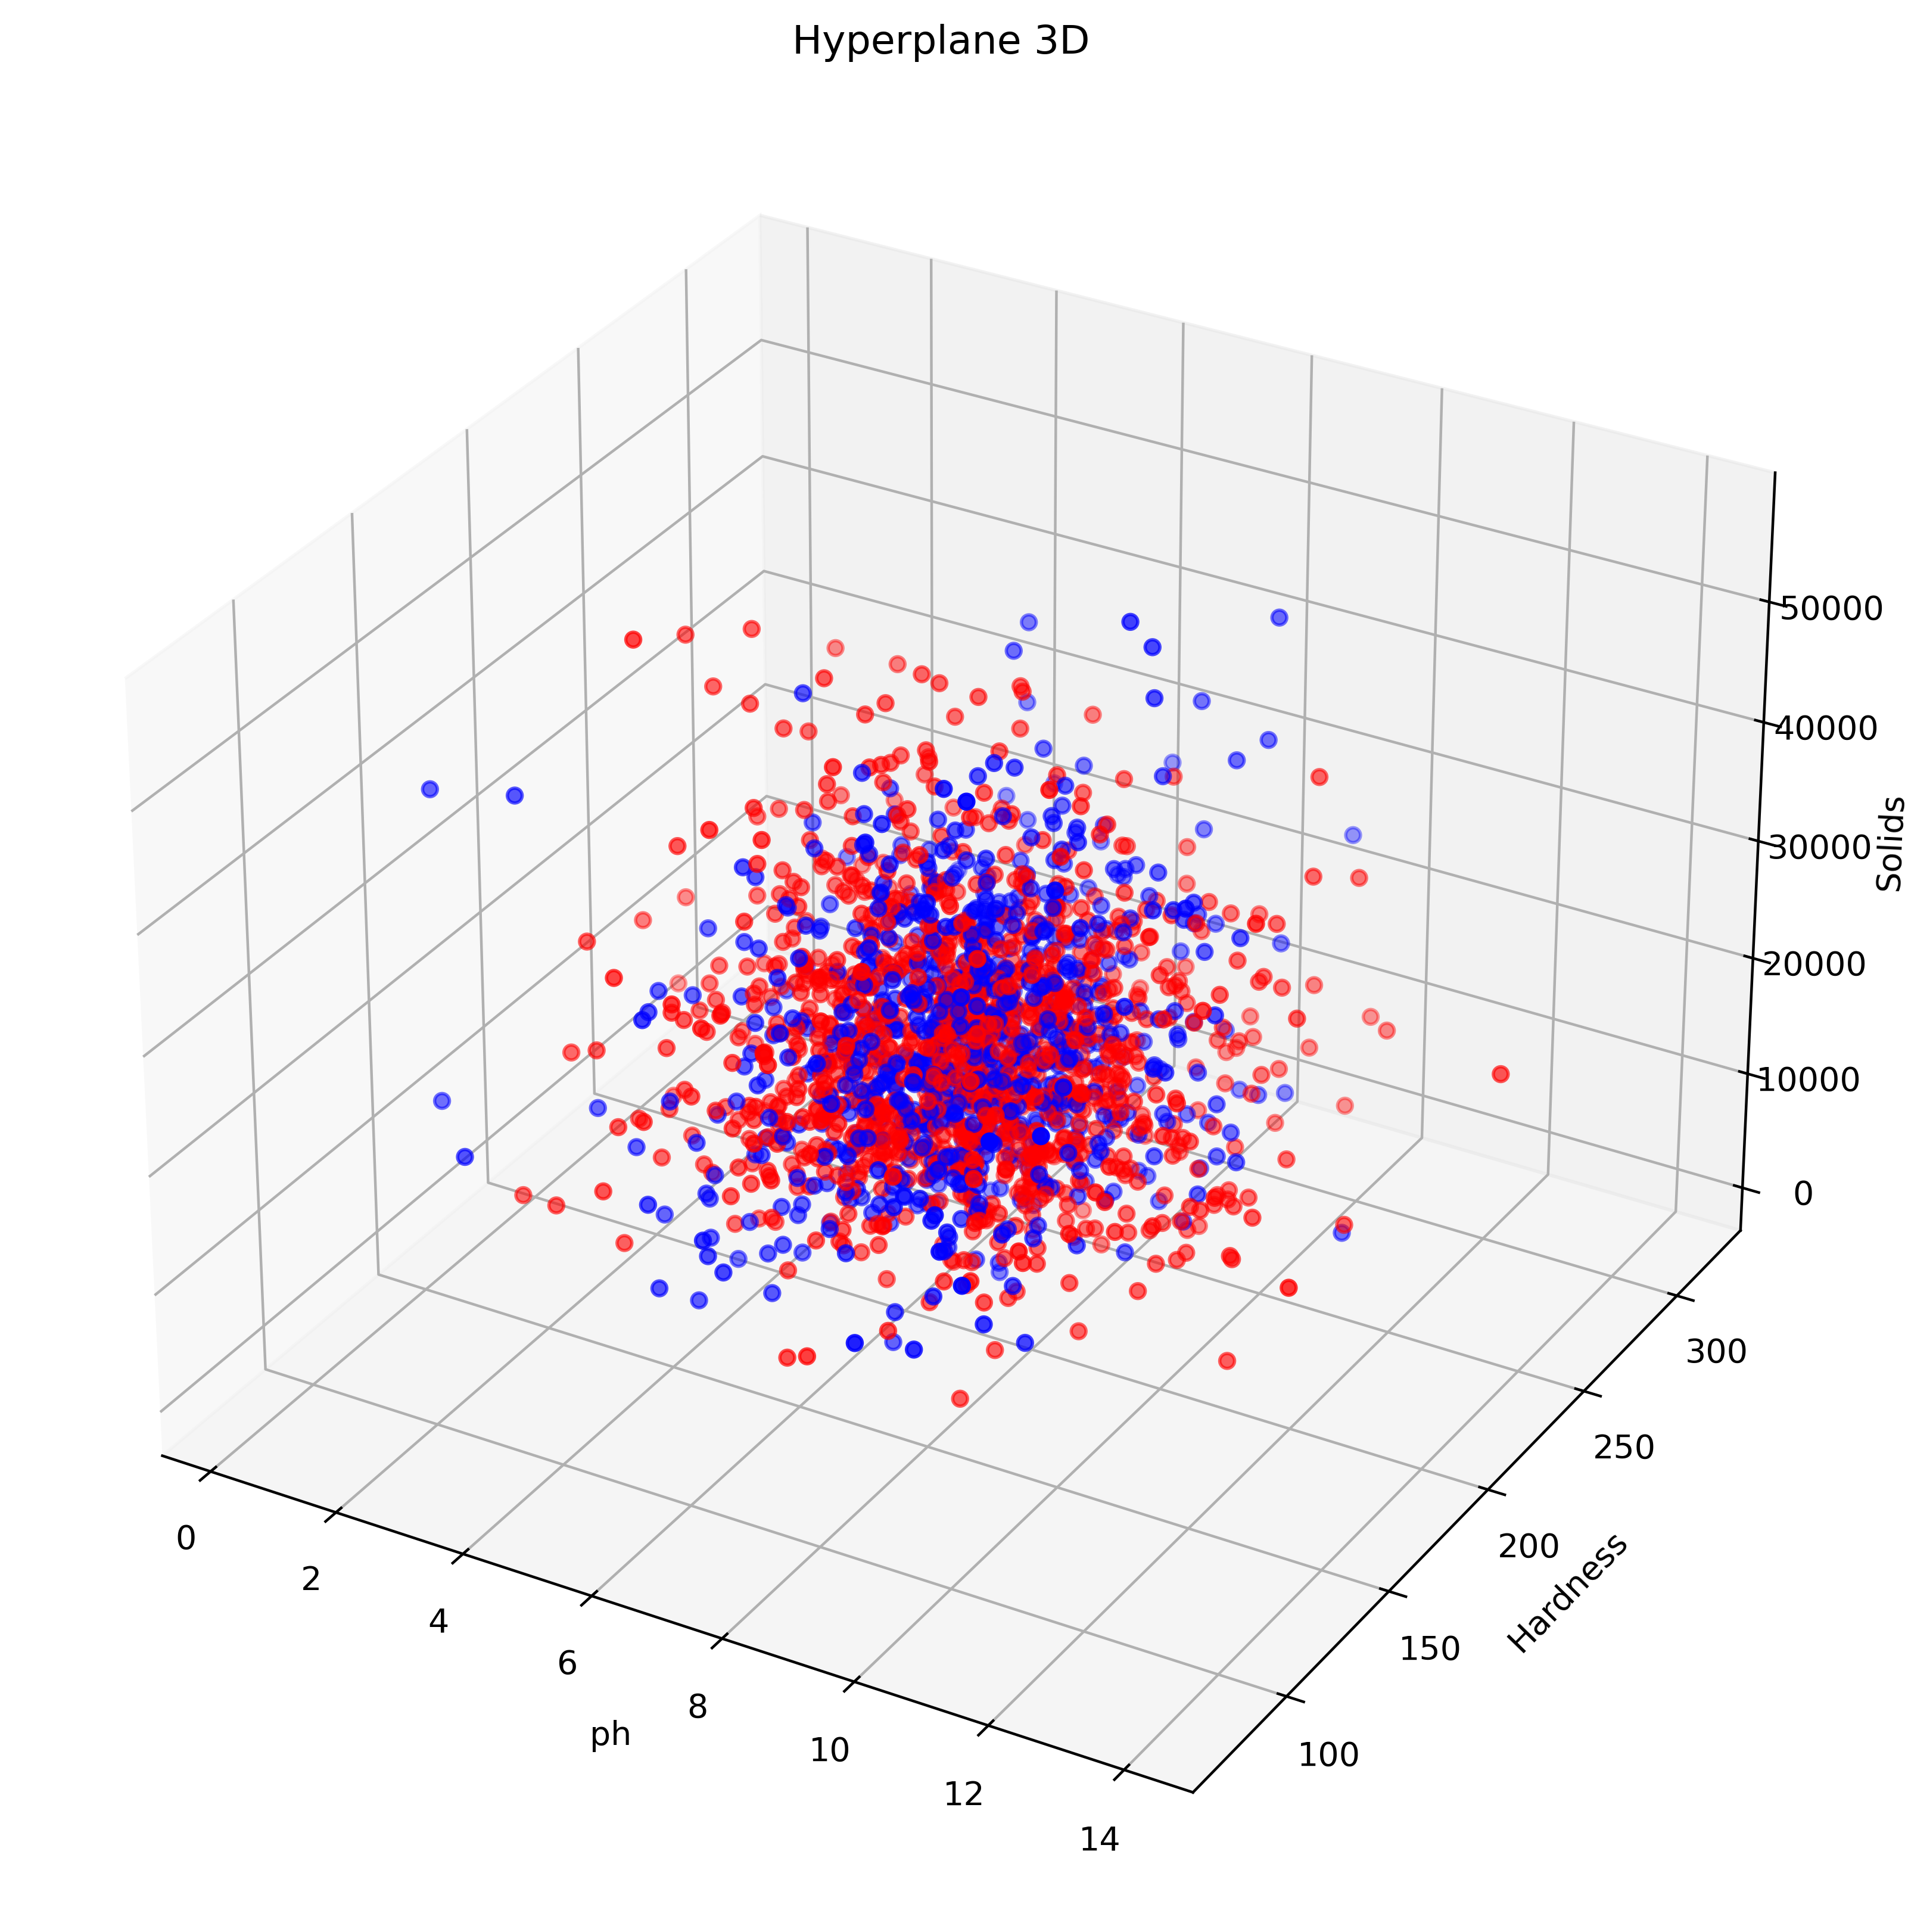

In [23]:
fig = plt.figure(figsize=(10, 10), dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    features_d3.iloc[:, 0],
    features_d3.iloc[:, 1],
    features_d3.iloc[:, 2],
    c=labels_hy3,  # Utiliza 'c' para especificar los colores # Puedes cambiar 'viridis' al mapa de colores que prefieras
)
ax.set_title('Hyperplane 3D')
ax.set_xlabel(features_d3.columns[0])
ax.set_ylabel(features_d3.columns[1])
ax.set_zlabel(features_d3.columns[2])
plt.show()

# **4. Exploration of the Curse of Dimensionality**
------
Let's write a generalized function to find the proportion of outside points to total points for an $n$ dimensional hyper_cube and plot the proportion per dimensionality from 1 to 1000 dimensions.


###### **prop:** Controla la proporción del rango de posiciones aleatorias que se considerará para determinar si un punto está fuera del hipercubo. Un valor más bajo hará que el rango permitido sea más pequeño, mientras que un valor más alto hará que el rango permitido sea más grande.

###### **dism:** Es la cantidad de dimensiones en el conjunto de datos, es decir, el número de columnas.

###### **num:** Representa la cantidad de puntos que se generarán aleatoriamente para realizar el análisis. En este caso, se establece en el 50% del total de puntos (totalPoints * 0.5).

In [24]:
def hyper_cube(dataset, prop=0.5, showBar=True):
    outsidePoints = 0
    totalPoints = len(dataset)
    dism = len(dataset.columns)
    num = int(totalPoints * 0.5)

    if showBar:
        barfunc = lambda x: tqdm(x)
    else:
        barfunc = lambda x: x

    for point in barfunc(range(num)):
        for dim in range(dism):
            randPos = np.random.uniform(0, 1)
            if randPos < (1 - prop) / 2 or randPos > 1 - (1 - prop) / 2:
                outsidePoints += 1
                break

    return outsidePoints / totalPoints


x = dimensions

y = percent outside points

In [25]:
x = range(1, df.shape[1])
y = []

In [26]:
for dim in tqdm(x):
    y.append(hyper_cube(df.iloc[:, :dim + 1], showBar=False))

  0%|          | 0/9 [00:00<?, ?it/s]

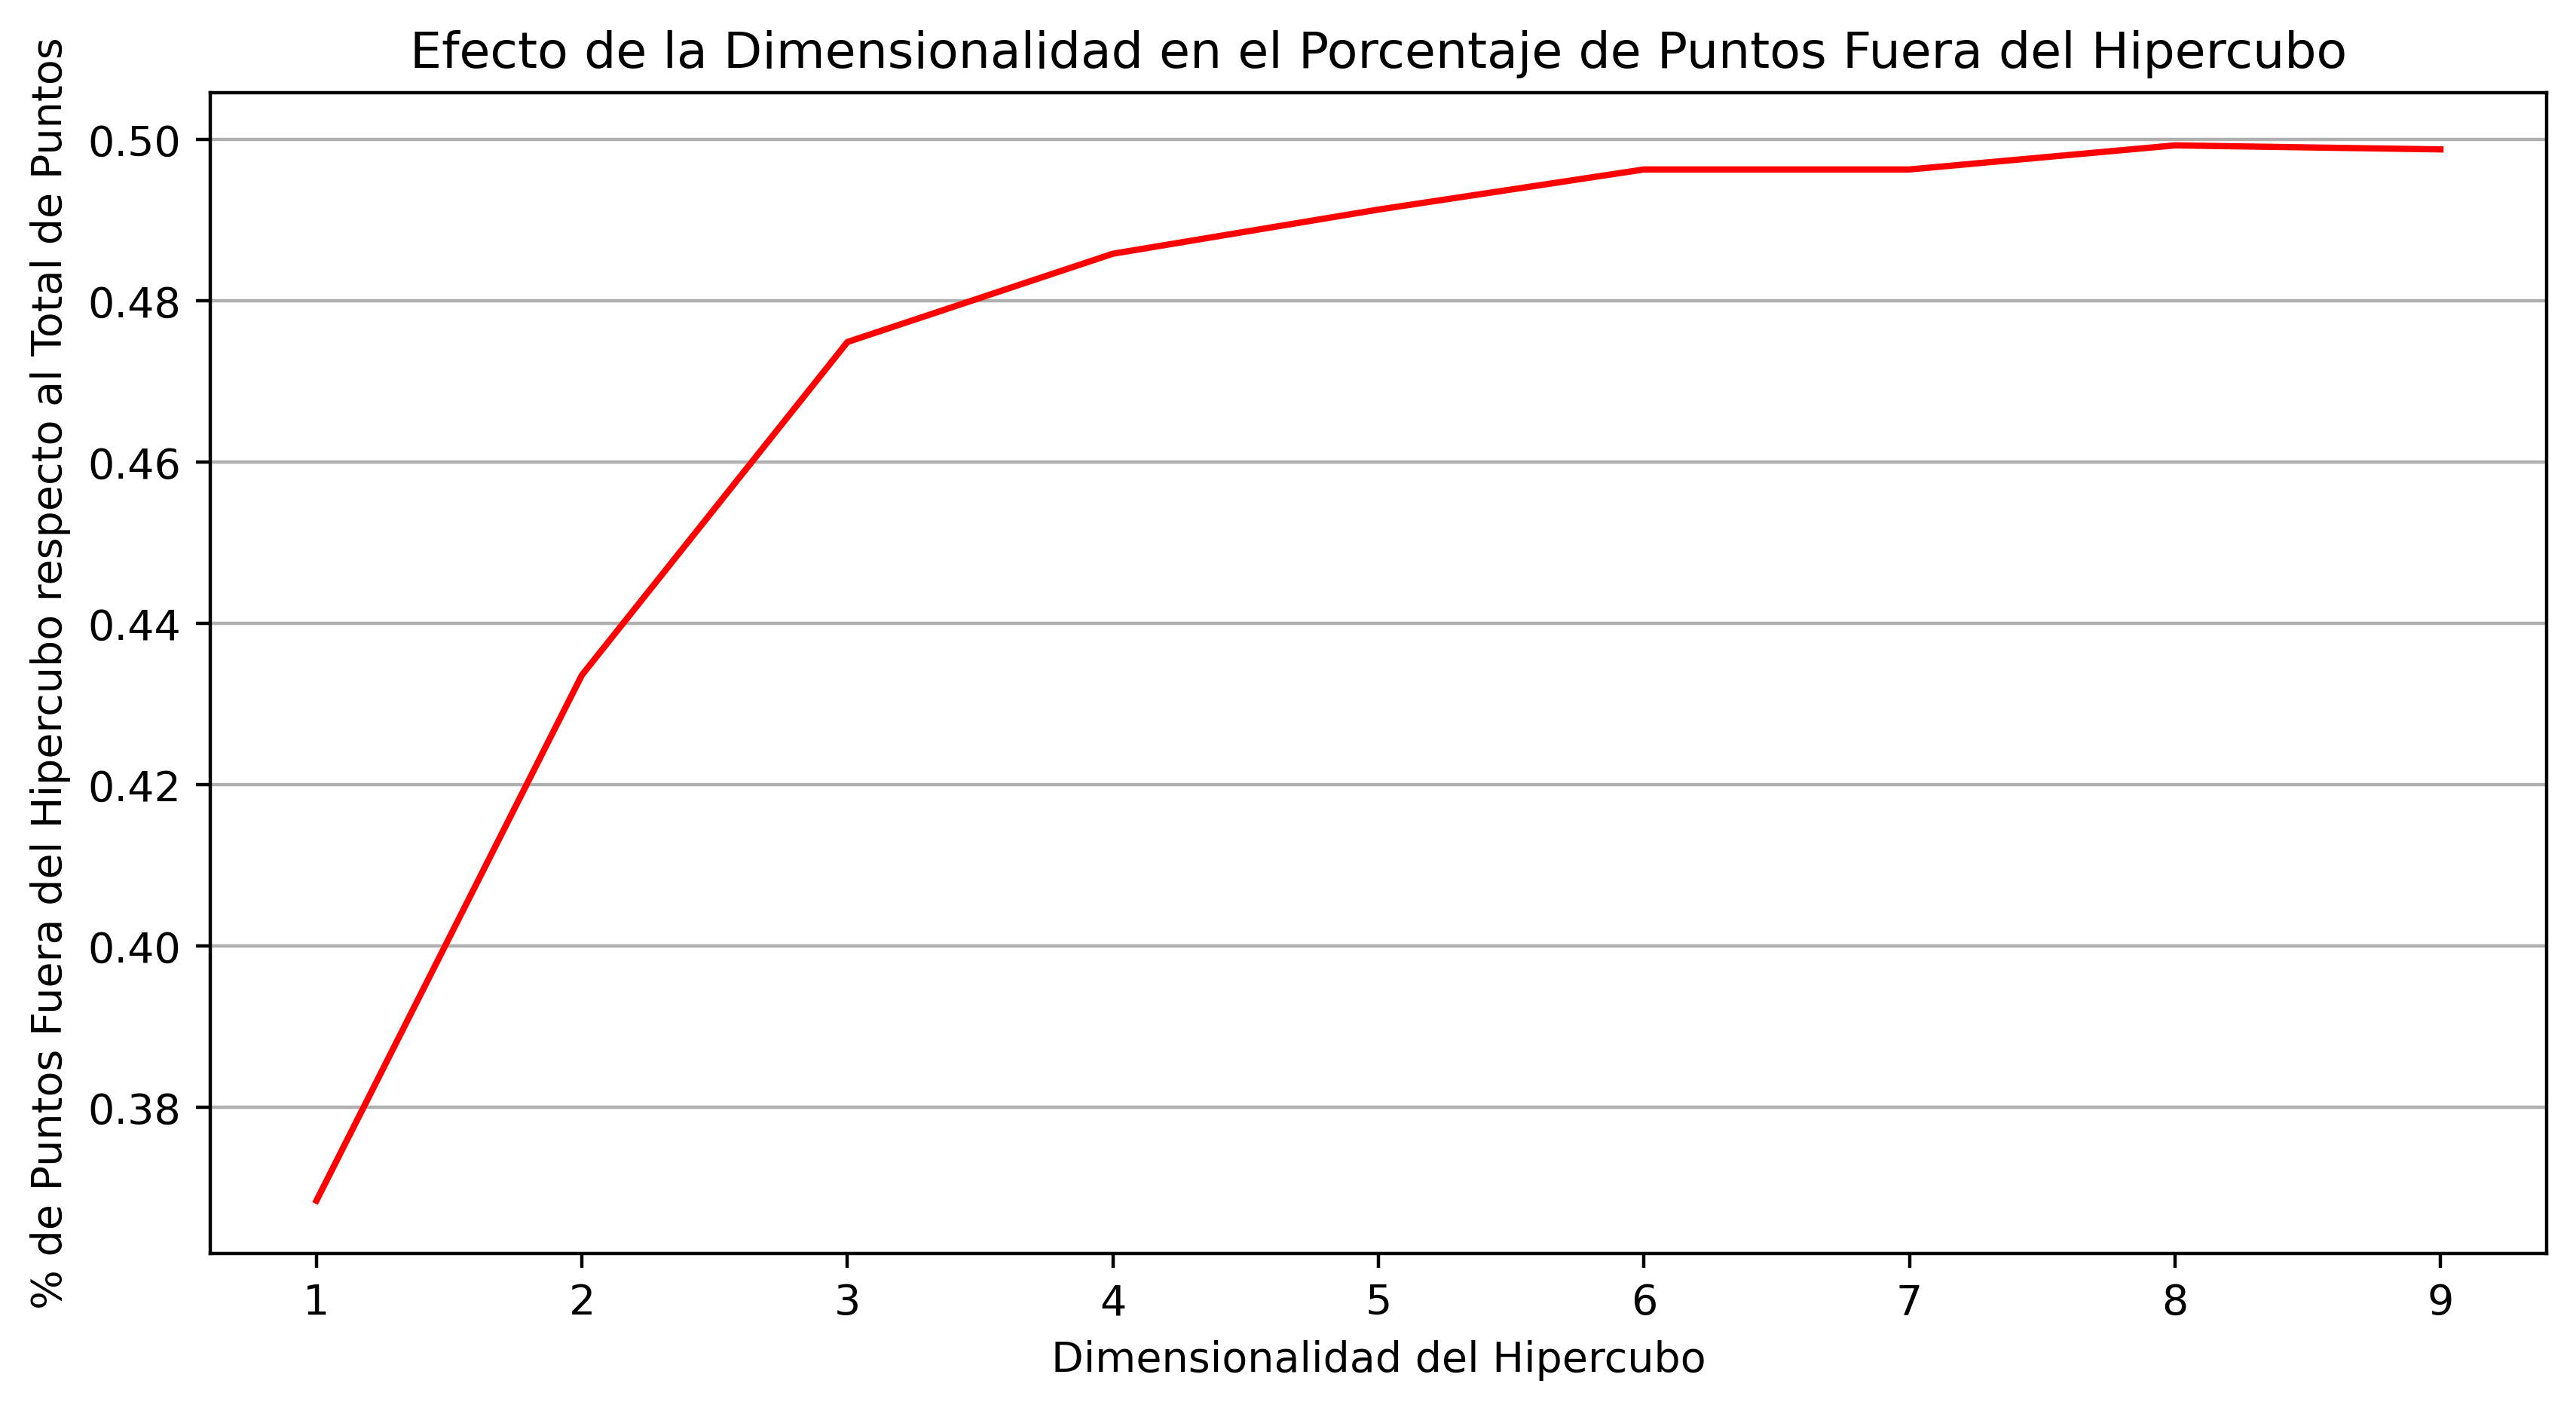

In [27]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(x, y, color='red')
plt.ylabel('% de Puntos Fuera del Hipercubo respecto al Total de Puntos')
plt.xlabel('Dimensionalidad del Hipercubo')
plt.title('Efecto de la Dimensionalidad en el Porcentaje de Puntos Fuera del Hipercubo')
axes = plt.gca()
axes.yaxis.grid()
plt.show()

In [28]:
percent_outside_points = hyper_cube(df, showBar=False)

print(f'Porcentaje de puntos fuera del hipercubo: {percent_outside_points:.2%}')

Porcentaje de puntos fuera del hipercubo: 49.73%


----------

Book: The distance between the second longest distance of two points and the longest distance of two points changes to zero as the dimensionality of a hyper_cube increases.

$$labels = √features - √features -1$$

In [29]:
random_values = features.sample(n=200)
features_space = random_values.iloc[:, :1]
labels_space = np.sqrt(features_space) - np.sqrt(features_space - 1)

In [30]:
features_space

ph
2122   8.107092
2066   6.741246
2075  14.000000
591    6.475885
2891   3.762098
...         ...
1062   8.815358
1629   6.341751
447    9.112786
138    9.562406
2416   7.542300

[200 rows x 1 columns]

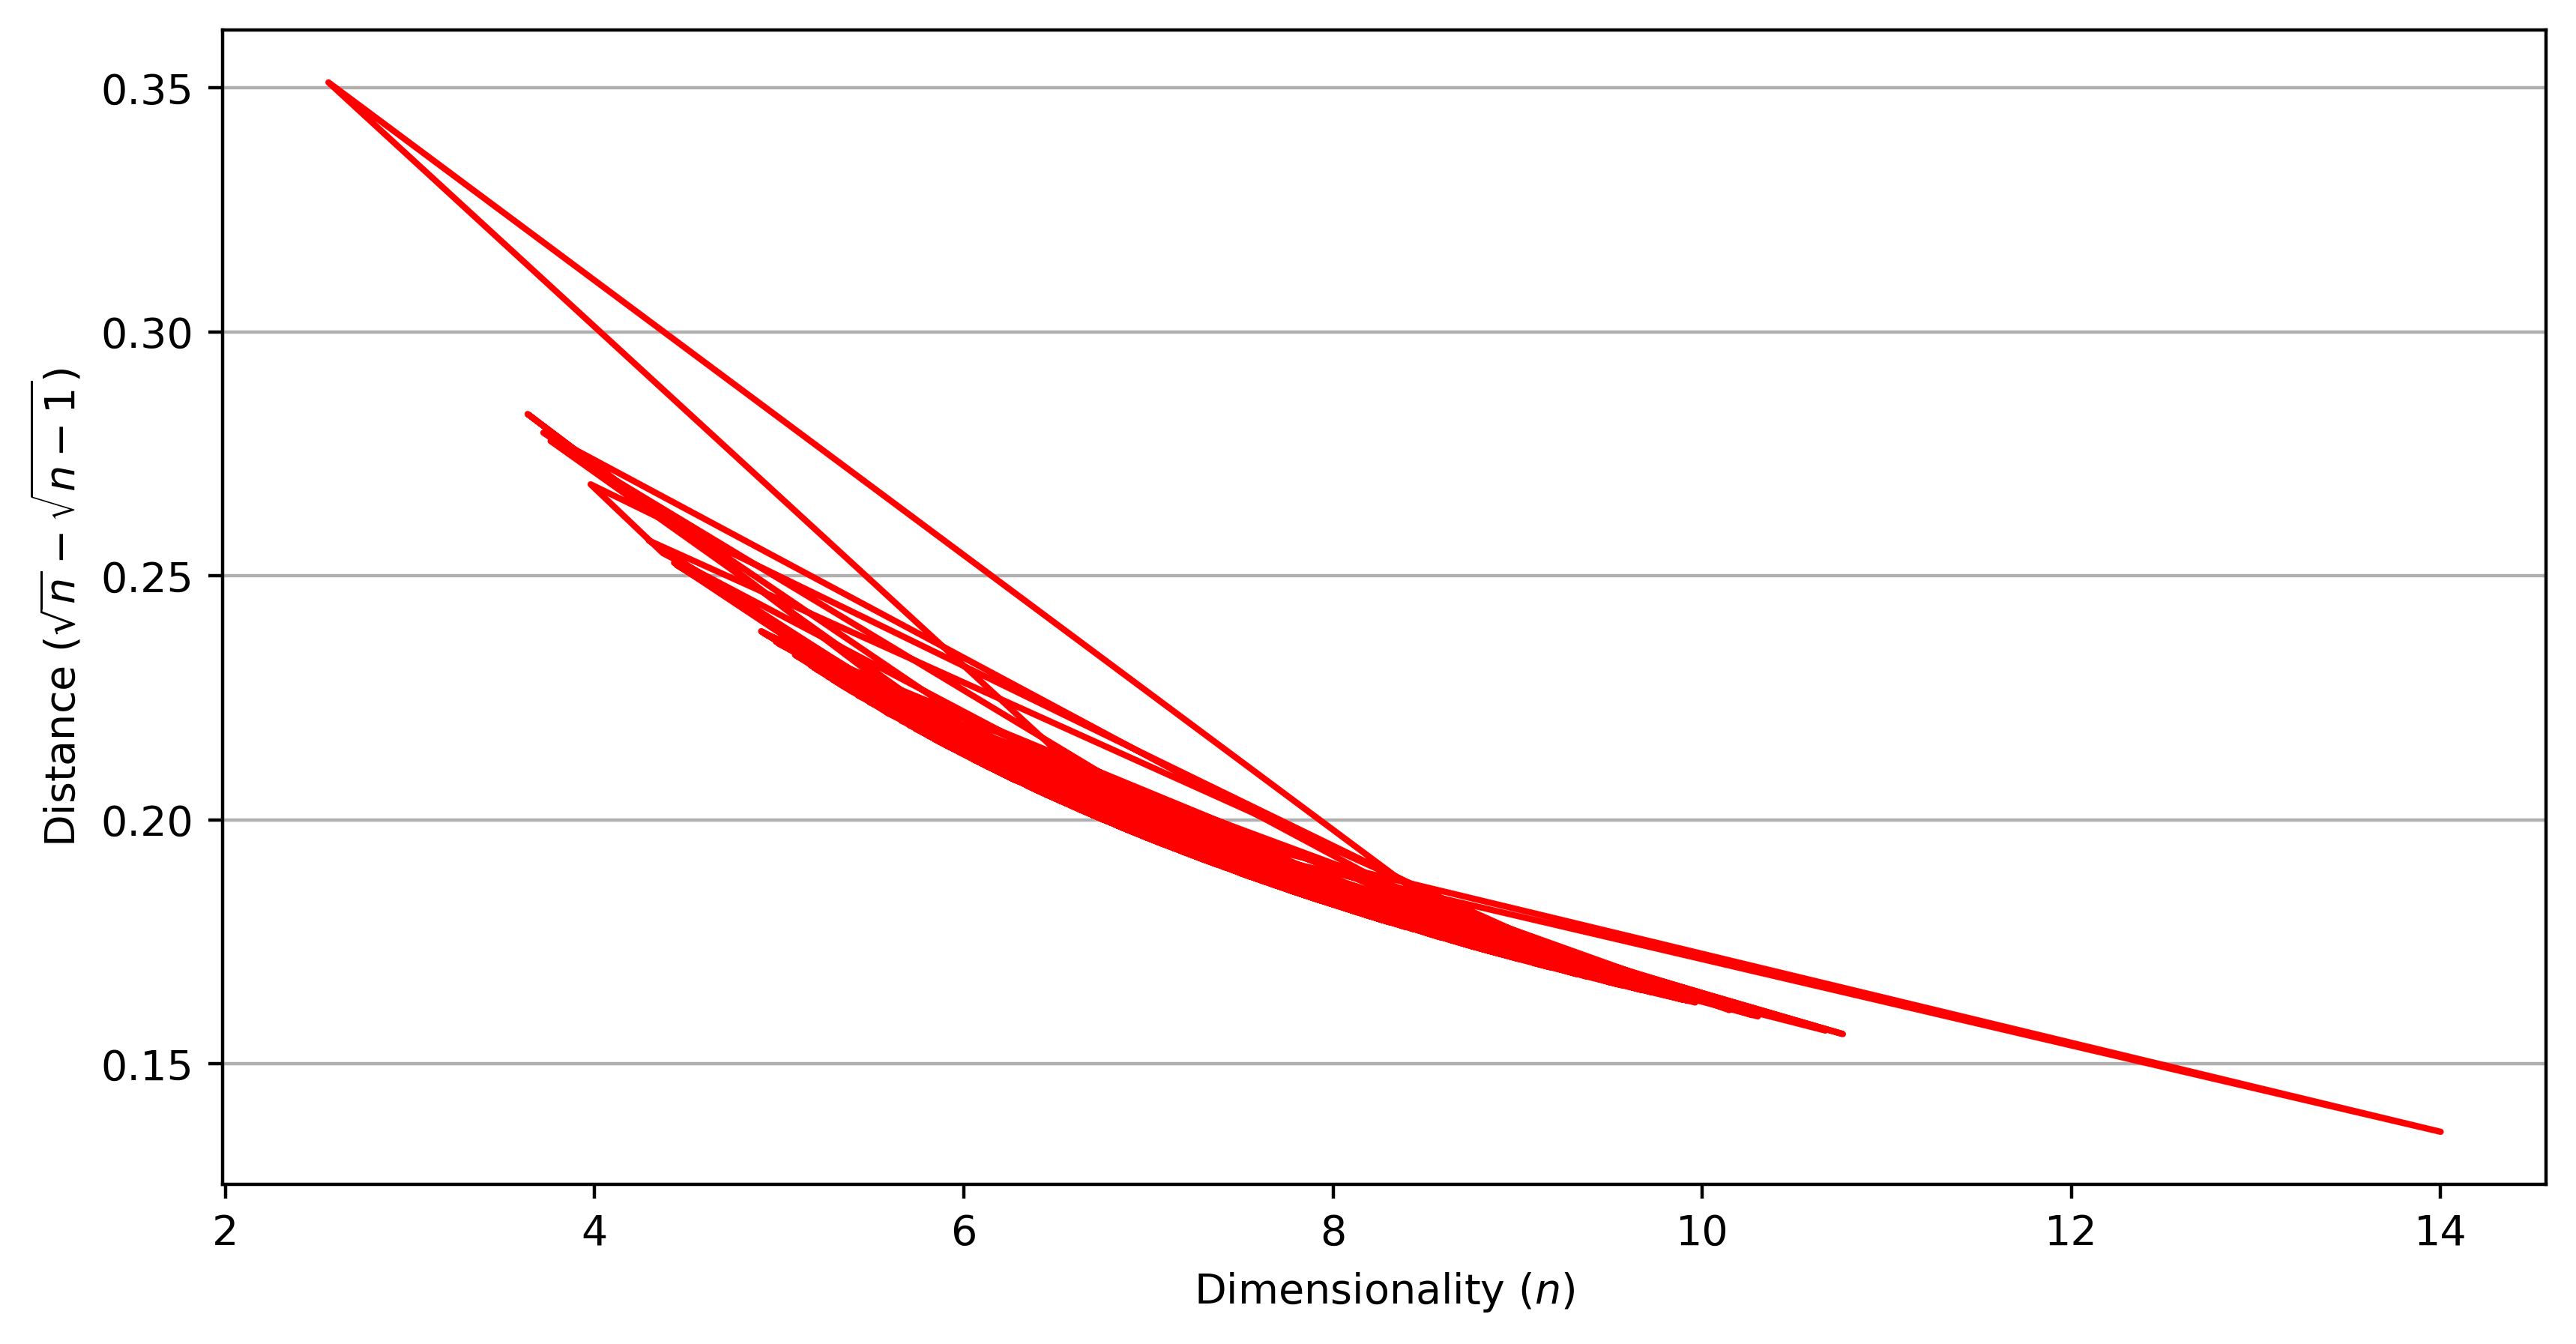

In [31]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(features_space, labels_space, color='red')
axes = plt.gca()
axes.yaxis.grid()
plt.ylabel('Distance ($\sqrt{n} - \sqrt{n-1}$)')
plt.xlabel('Dimensionality ($n$)')
plt.show()

# **5. Optimization and Gradient Descent**
-----------

> Necesitar una función de transformación diferente, no se cual es :v

In [32]:
features_gradient = np.linspace(features.iloc[:, :1].min(), features.iloc[:, :1].max(), 100)
targets = np.sin(features_gradient) + features_gradient**2/10 + 1
features_gradient = features_gradient.reshape(-1, 1)

In [33]:
f = lambda x:np.sin(x) + x**2/10 + 1

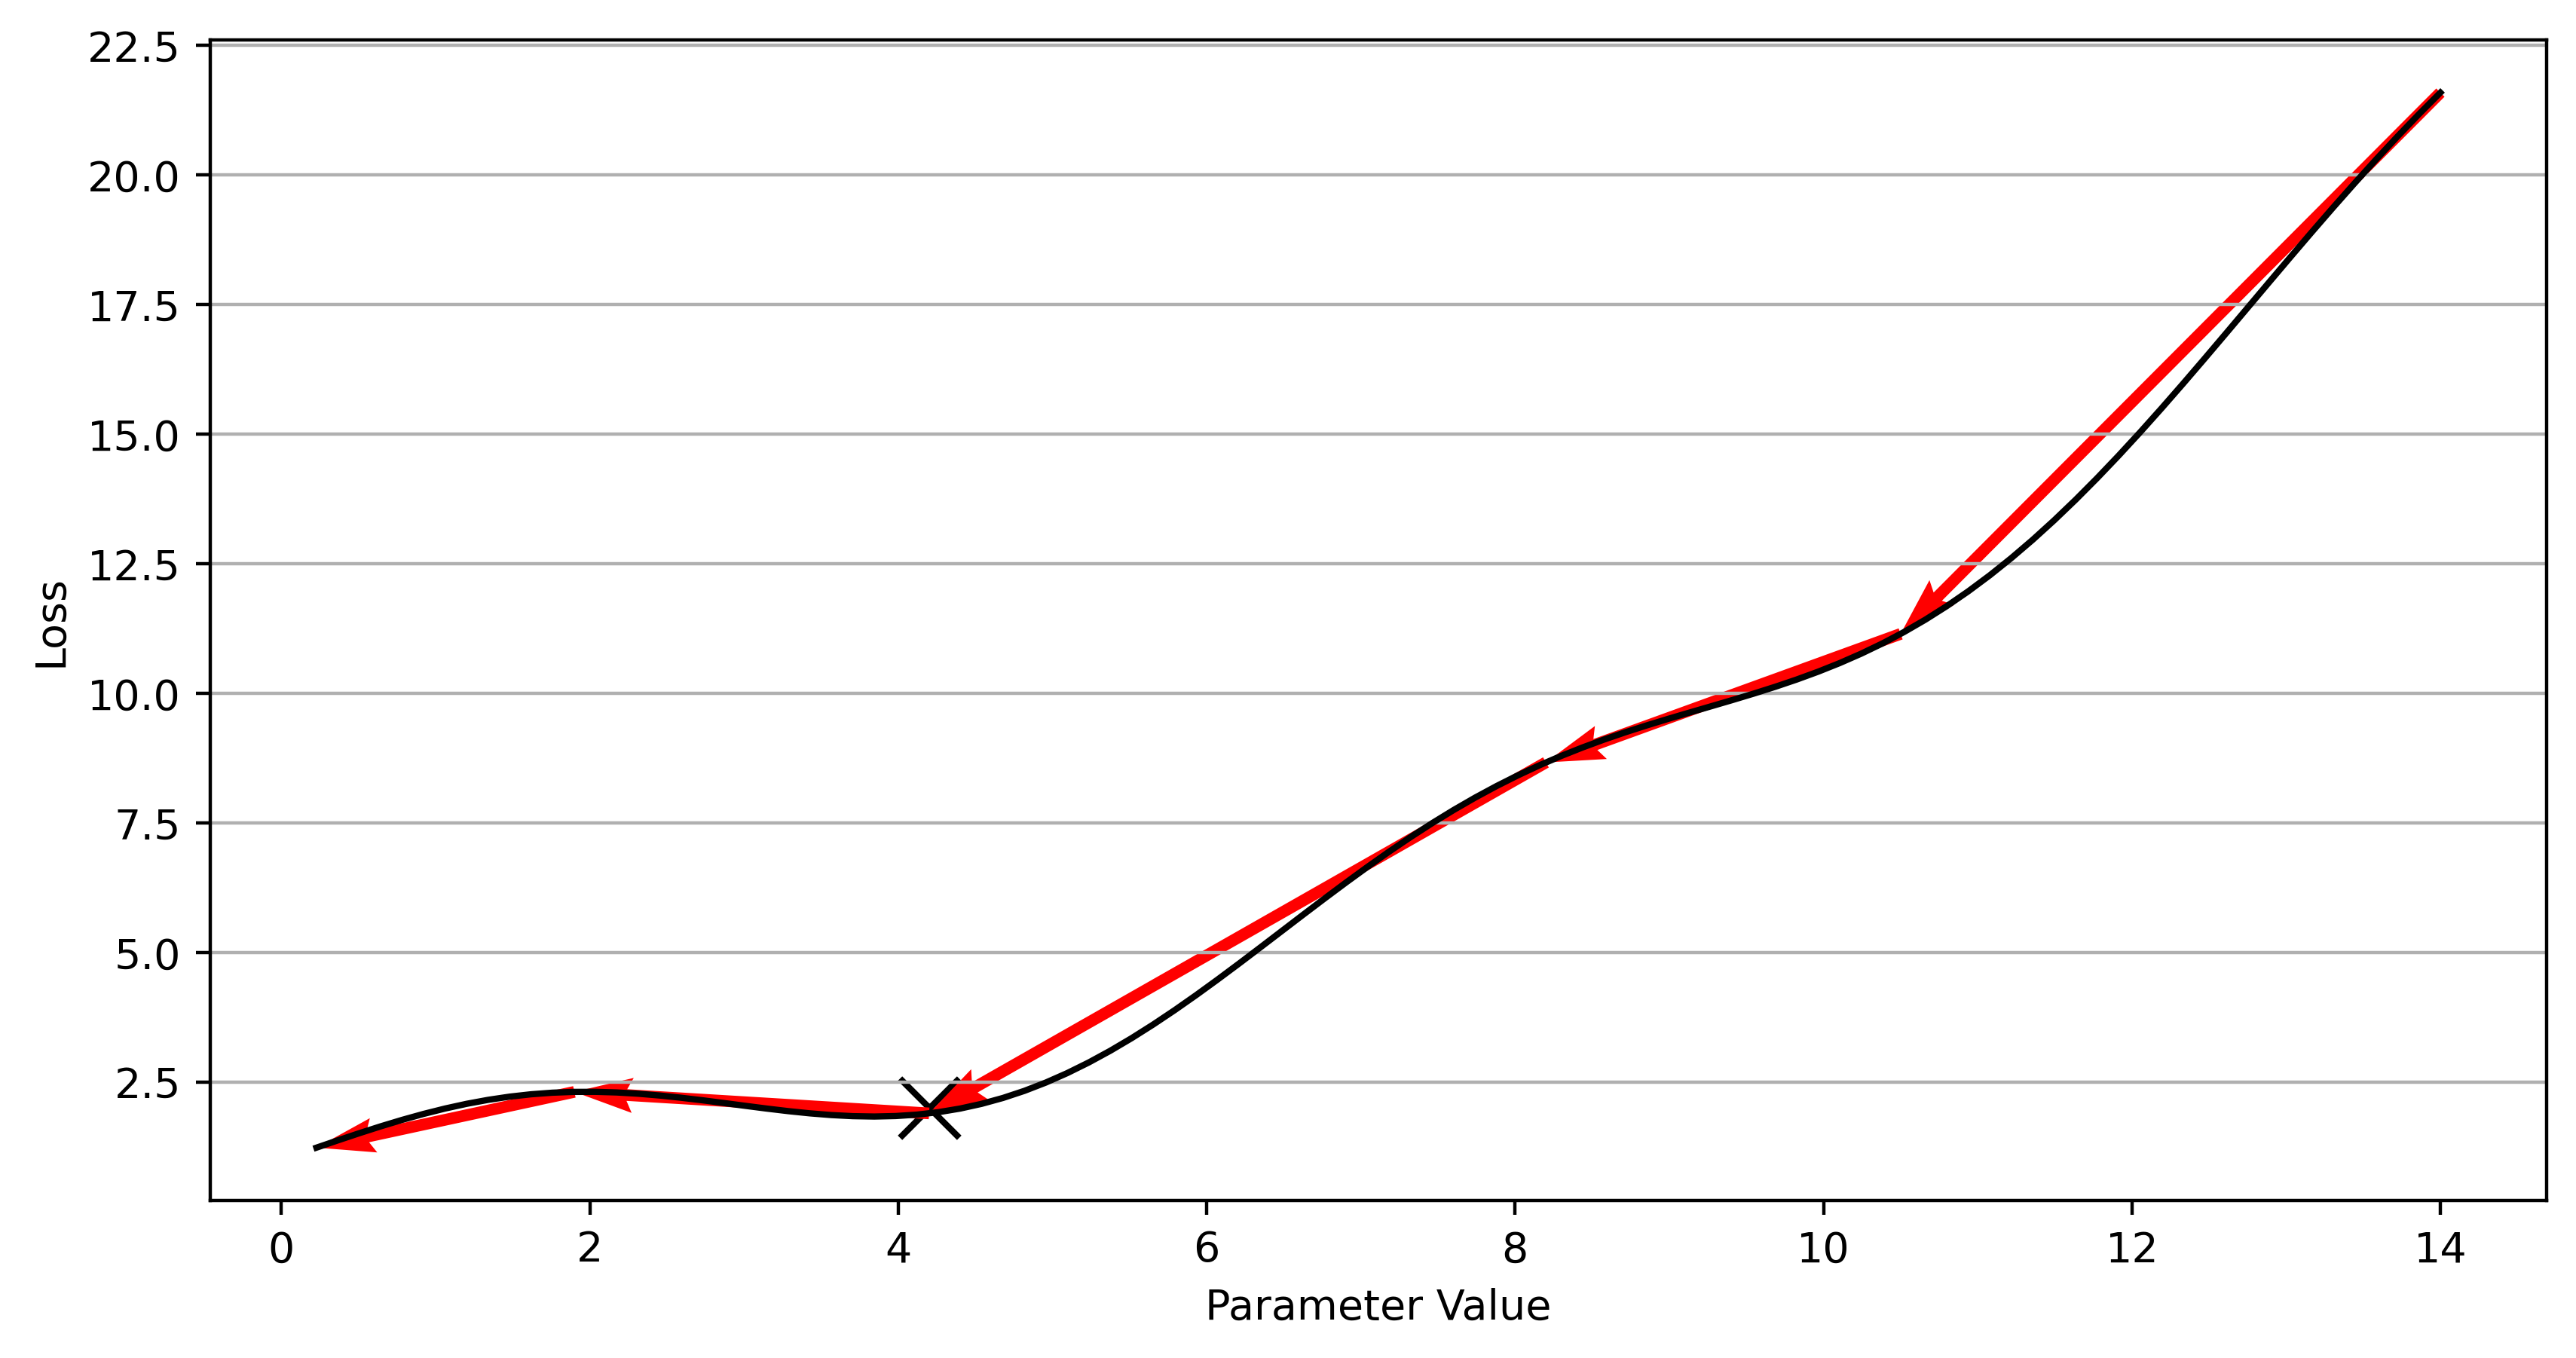

In [34]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

# Punto de interés
plt.scatter([4.2], [2], color='black', marker='x', s=200)

# Línea roja de la función objetivo
x = np.array([features_gradient.max(), 10.5, 8.2, 4.2, 1.9, features_gradient.min()])

dx = np.diff(x)
dy = np.diff(f(x))
axes.quiver(x[:-1], f(x)[:-1], dx, dy, angles='xy', scale_units='xy', scale=1,
            linestyle='--', width=0.005, color='red')

# Gráfico de la función objetivo
plt.plot(features_gradient, targets, color='black')

plt.ylabel('Loss')
plt.xlabel('Parameter Value')

plt.show()

Tracemos varias minimizaciones del descenso de gradiente para la función $\sin x + \frac{x^2}{10} + 1$.

In [35]:
def plot_gd_min(learn_rate=0.5, curr_x=6):
    cost = lambda x: np.sin(x) + x**2/10 + 1
    gradient = lambda x: np.cos(x) + 2*x / 10

    x_values = []
    for iteration in range(10):
        x_values.append(curr_x)
        curr_x += -learn_rate * gradient(curr_x)

    features_gradient = np.linspace(features.iloc[:, :1].min(), features.iloc[:, :1].max(), 100)
    targets = np.sin(features_gradient) + features_gradient**2/10 + 1
    features_gradient = features_gradient.reshape(-1, 1)

    f = lambda x: np.sin(x) + x**2/10 + 1

    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    # Punto de interés
    plt.scatter([4.2], [2], color='black', marker='x', s=200)

    x_values = np.array(x_values)
    axes.quiver(x_values[:-1],
                f(x_values)[:-1],
                ([x_values[i+1]-x_values[i] for i in range(len(x_values[:-1]))]),
                ([f(x_values)[i+1]-f(x_values)[i] for i in range(len(f(x_values)[:-1]))]),
                angles='xy',
                scale_units='xy',
                scale=1,
                linestyle='--',
                width=0.005,
                color='red')

    plt.plot(features_gradient, targets, color='black')

    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()

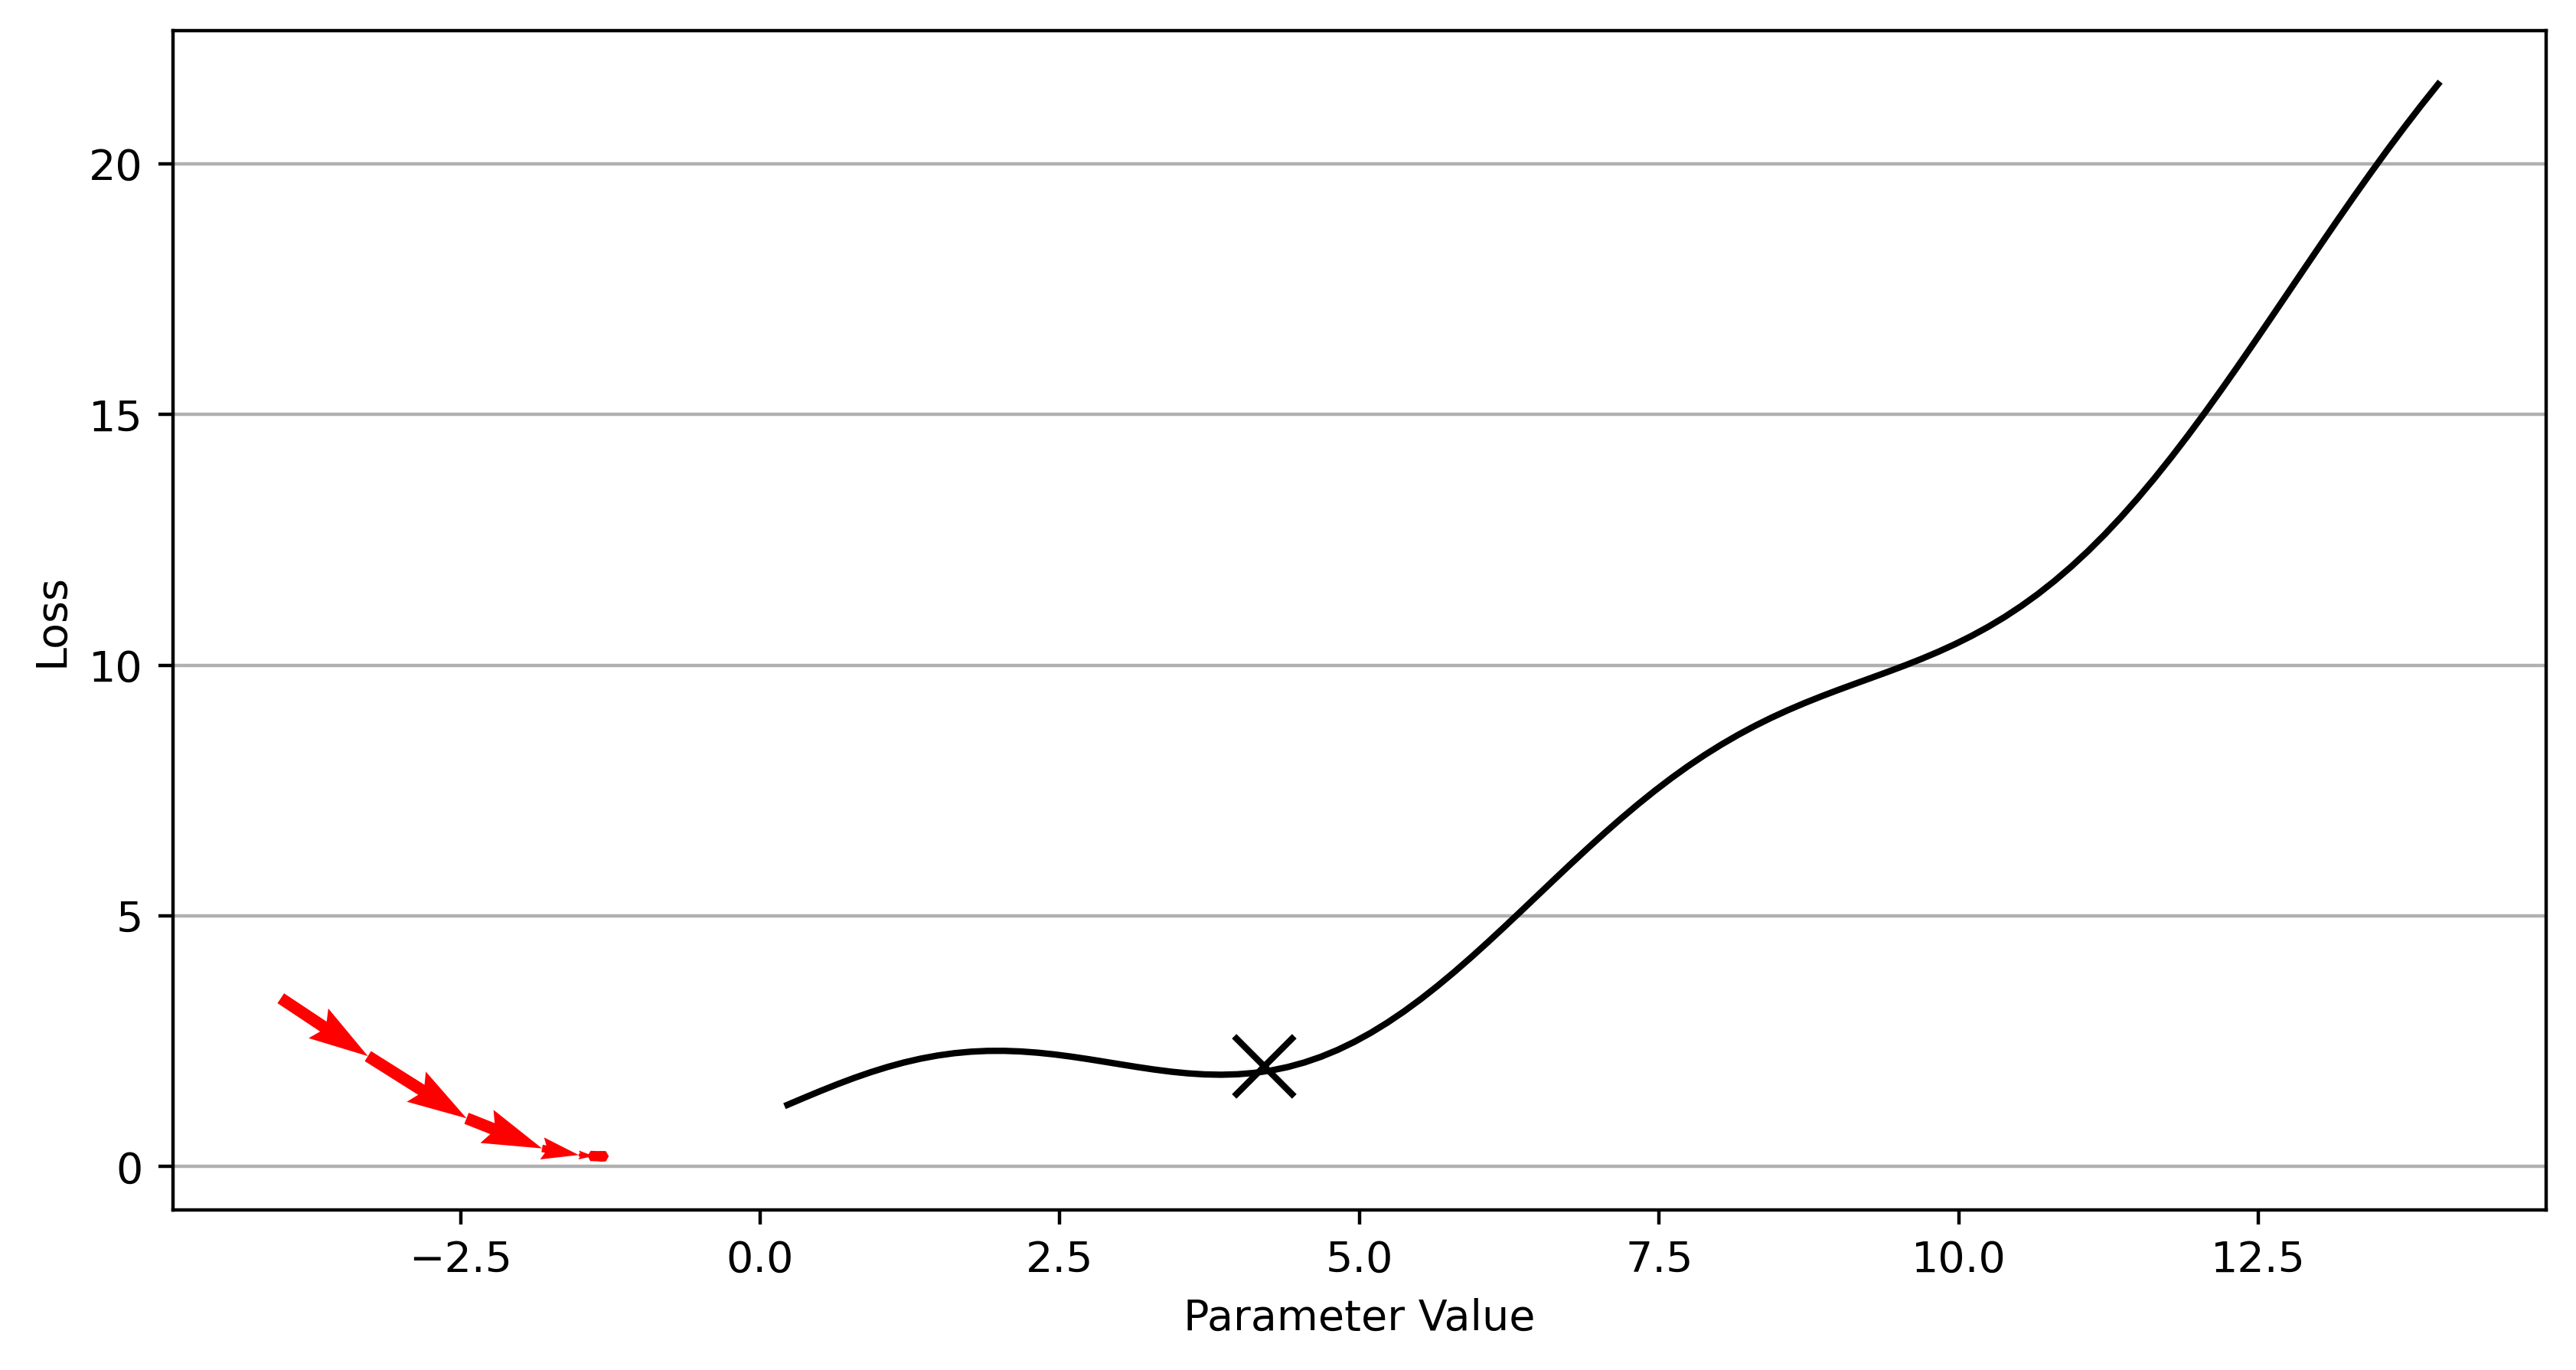

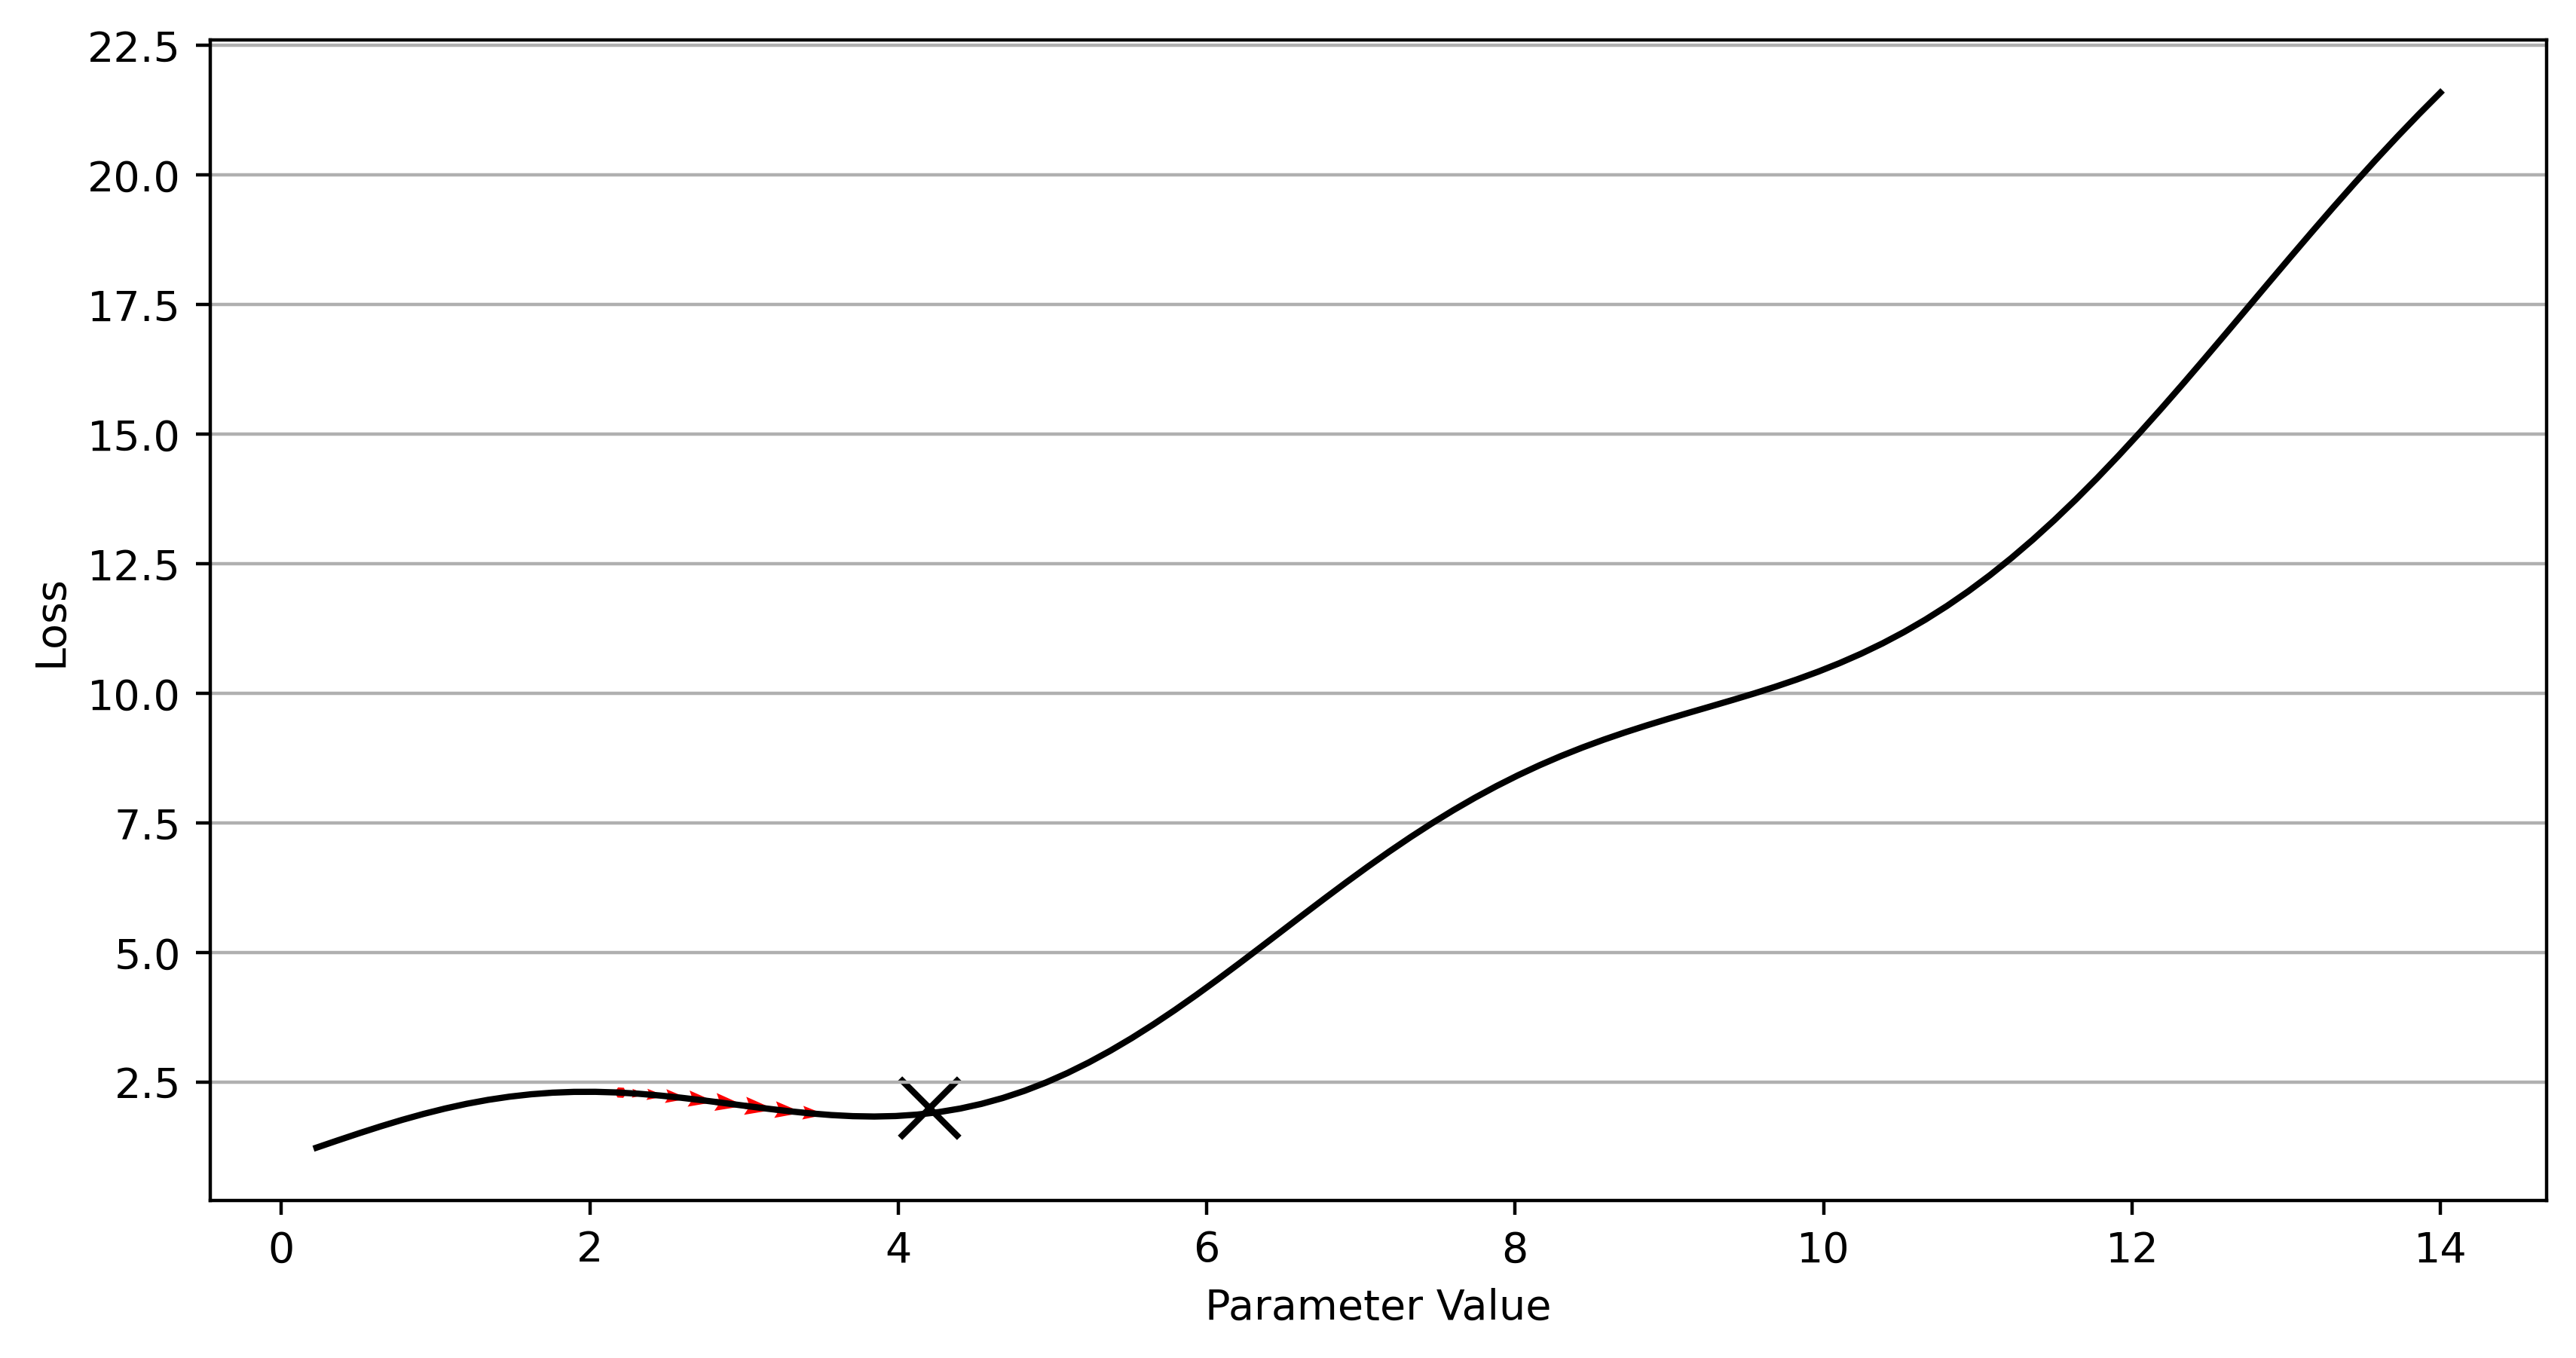

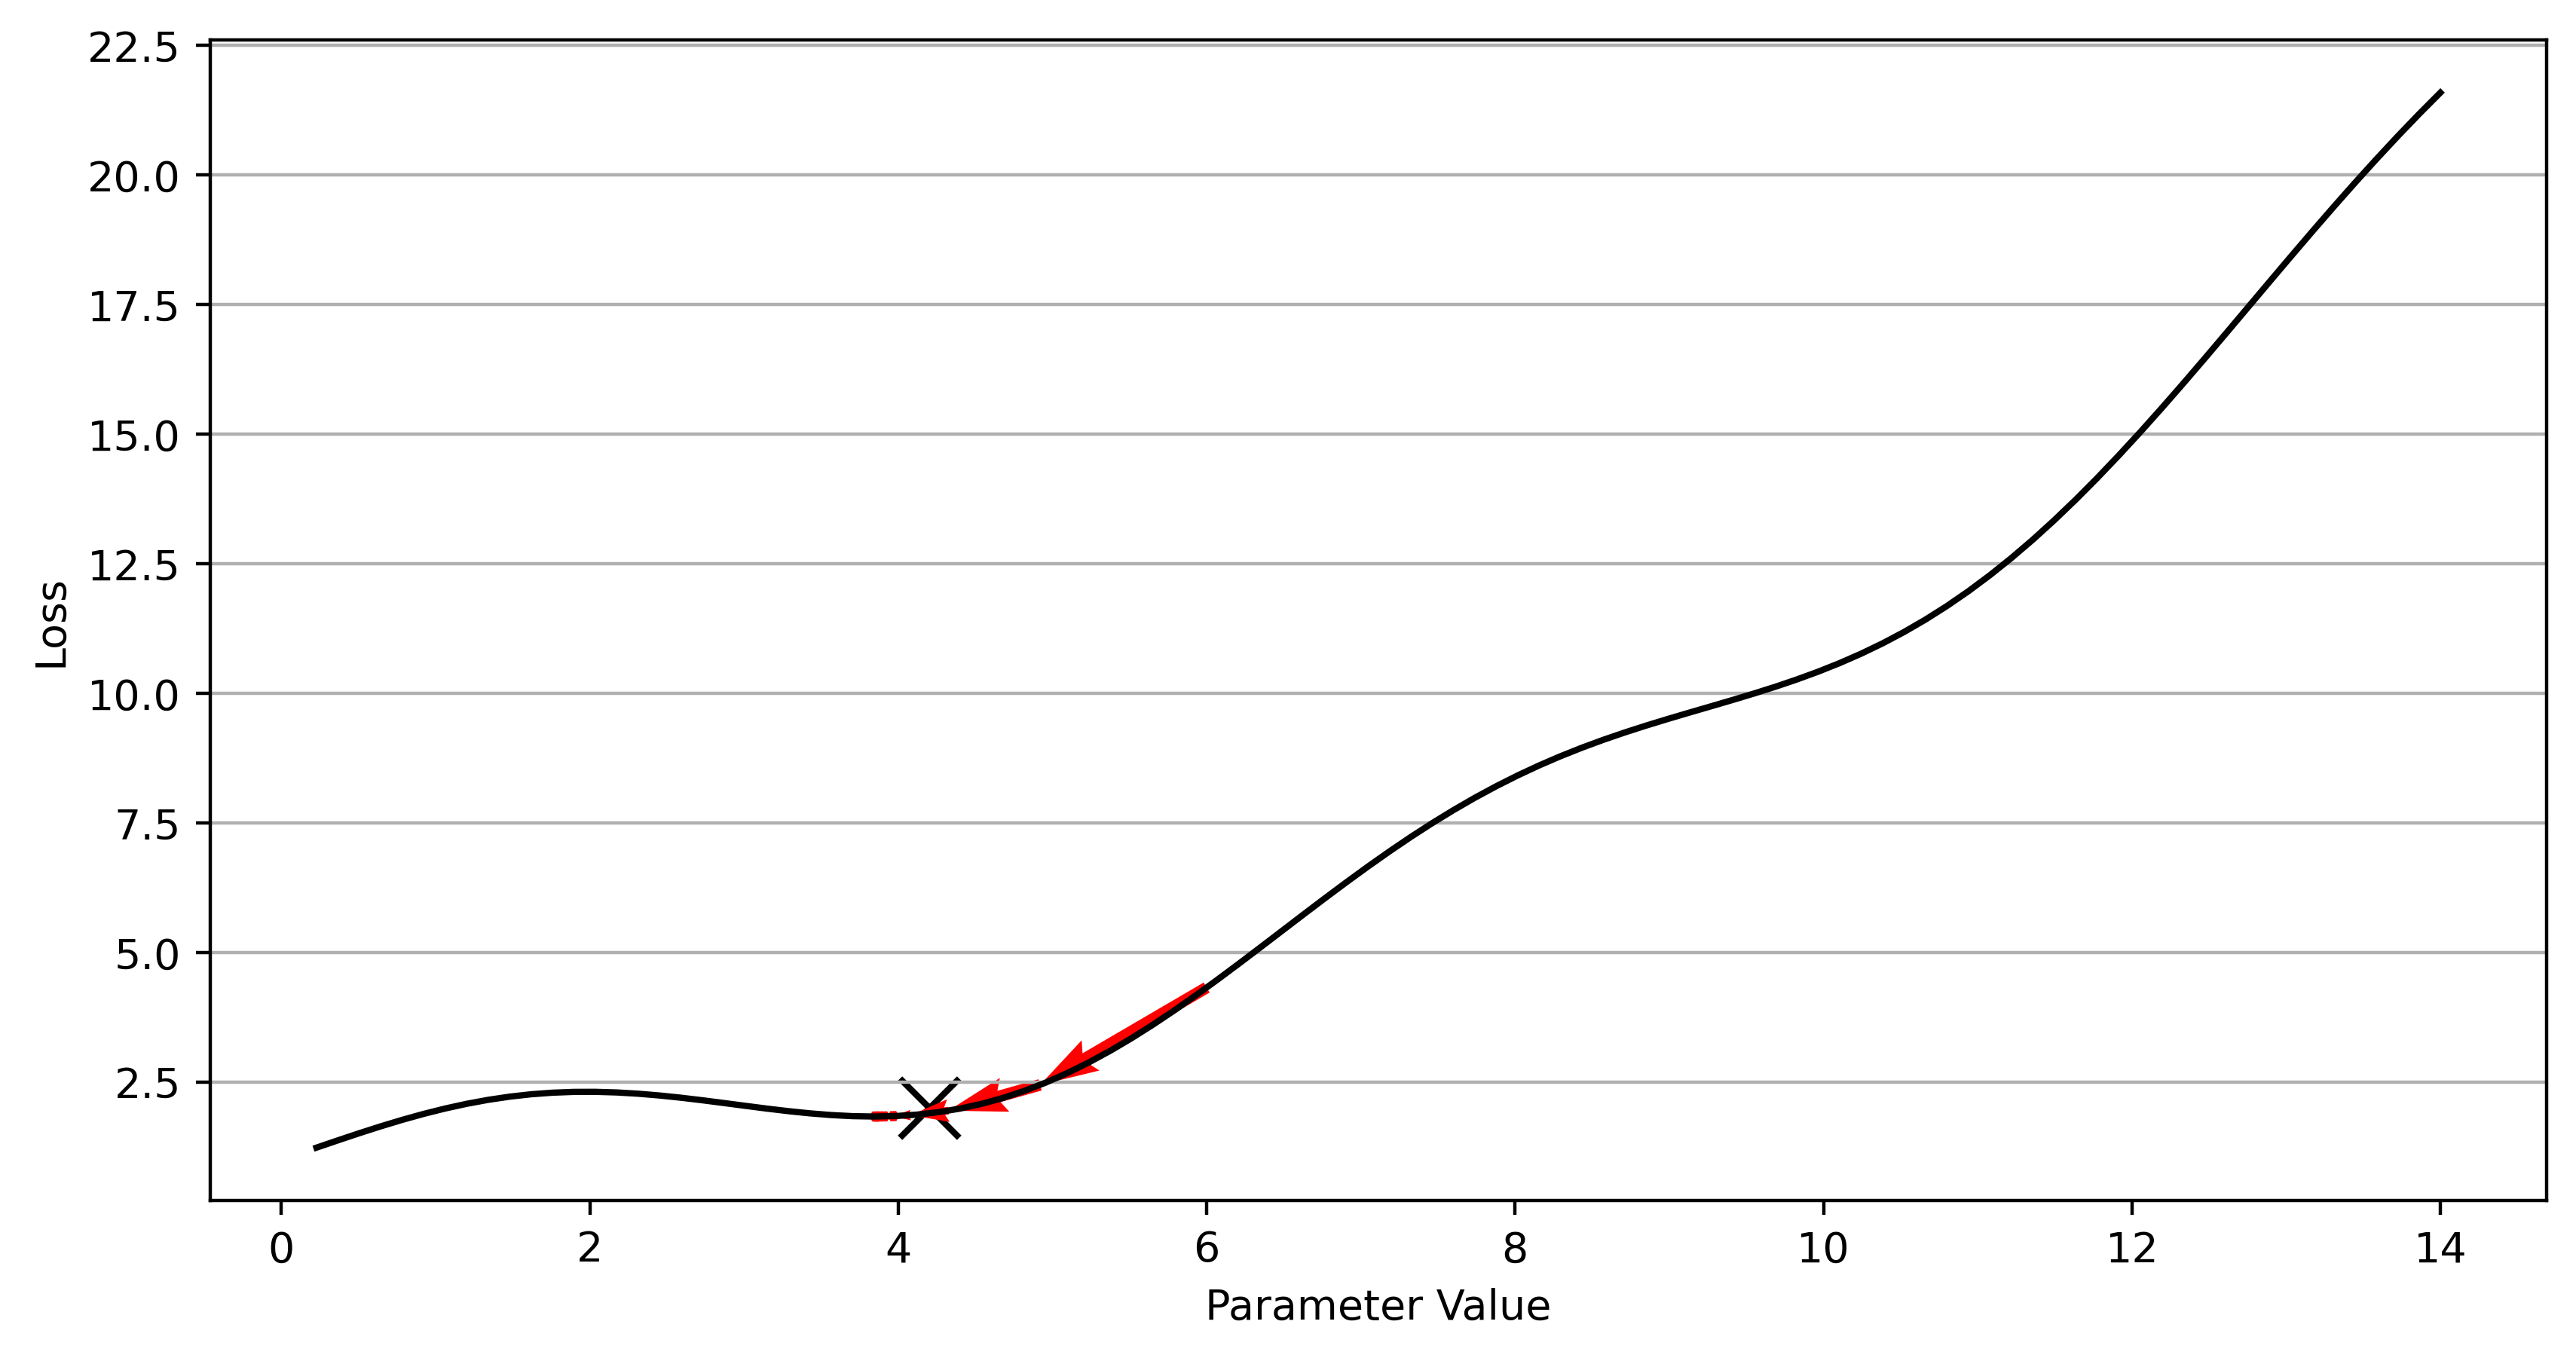

In [36]:
plot_gd_min(learn_rate = 0.5, curr_x = -4)
plot_gd_min(learn_rate = 0.5, curr_x = 2.2)
plot_gd_min(learn_rate = 0.5, curr_x = 6)

Trazar un ejemplo de ajuste de regresión lineal simple con descenso de gradiente.

In [86]:
random_values = features.sample(n=200)
x = random_values.iloc[:, :1]
y = labels[random_values.index]
print(x.shape, y.shape)

(200, 1) (200,)


In [87]:
def predict(beta, x):
    return beta * x	

In [88]:
def gradient(beta, x, y):
    errors = predict(beta, x) - y
    return np.mean(errors)

In [89]:
# plot value of beta over time
learn_rate = 0.02
curr_beta = 0
history = []

In [90]:
for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, x, y)
    history.append(curr_beta)

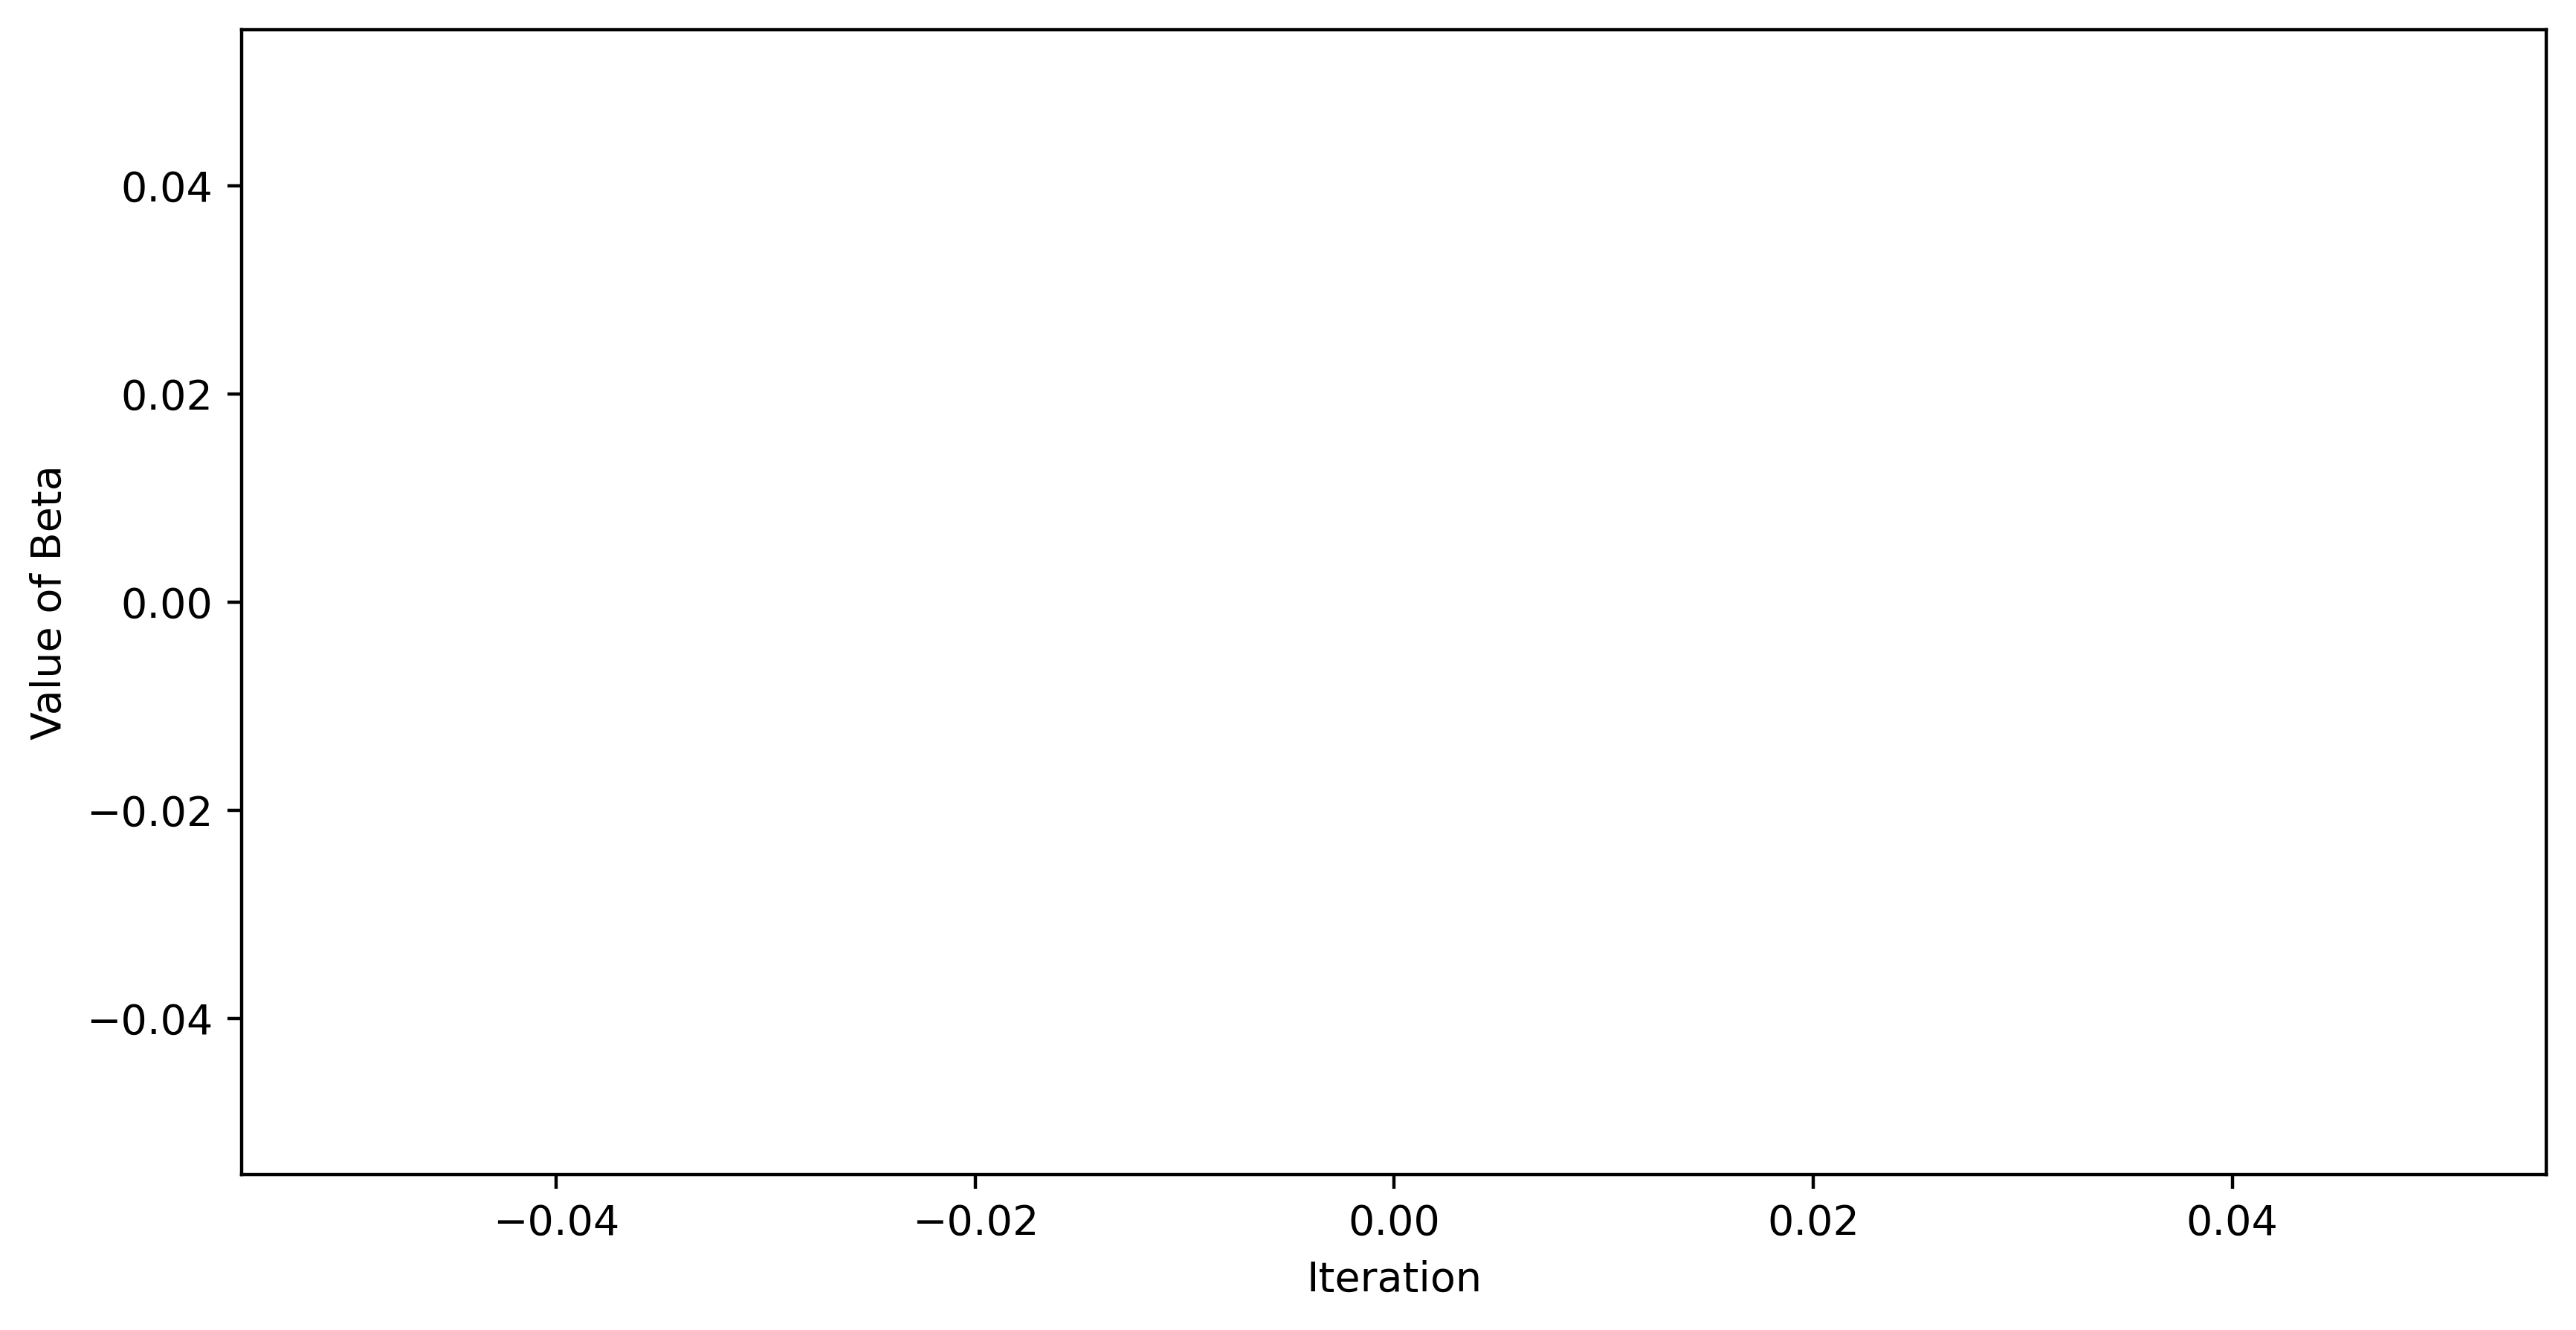

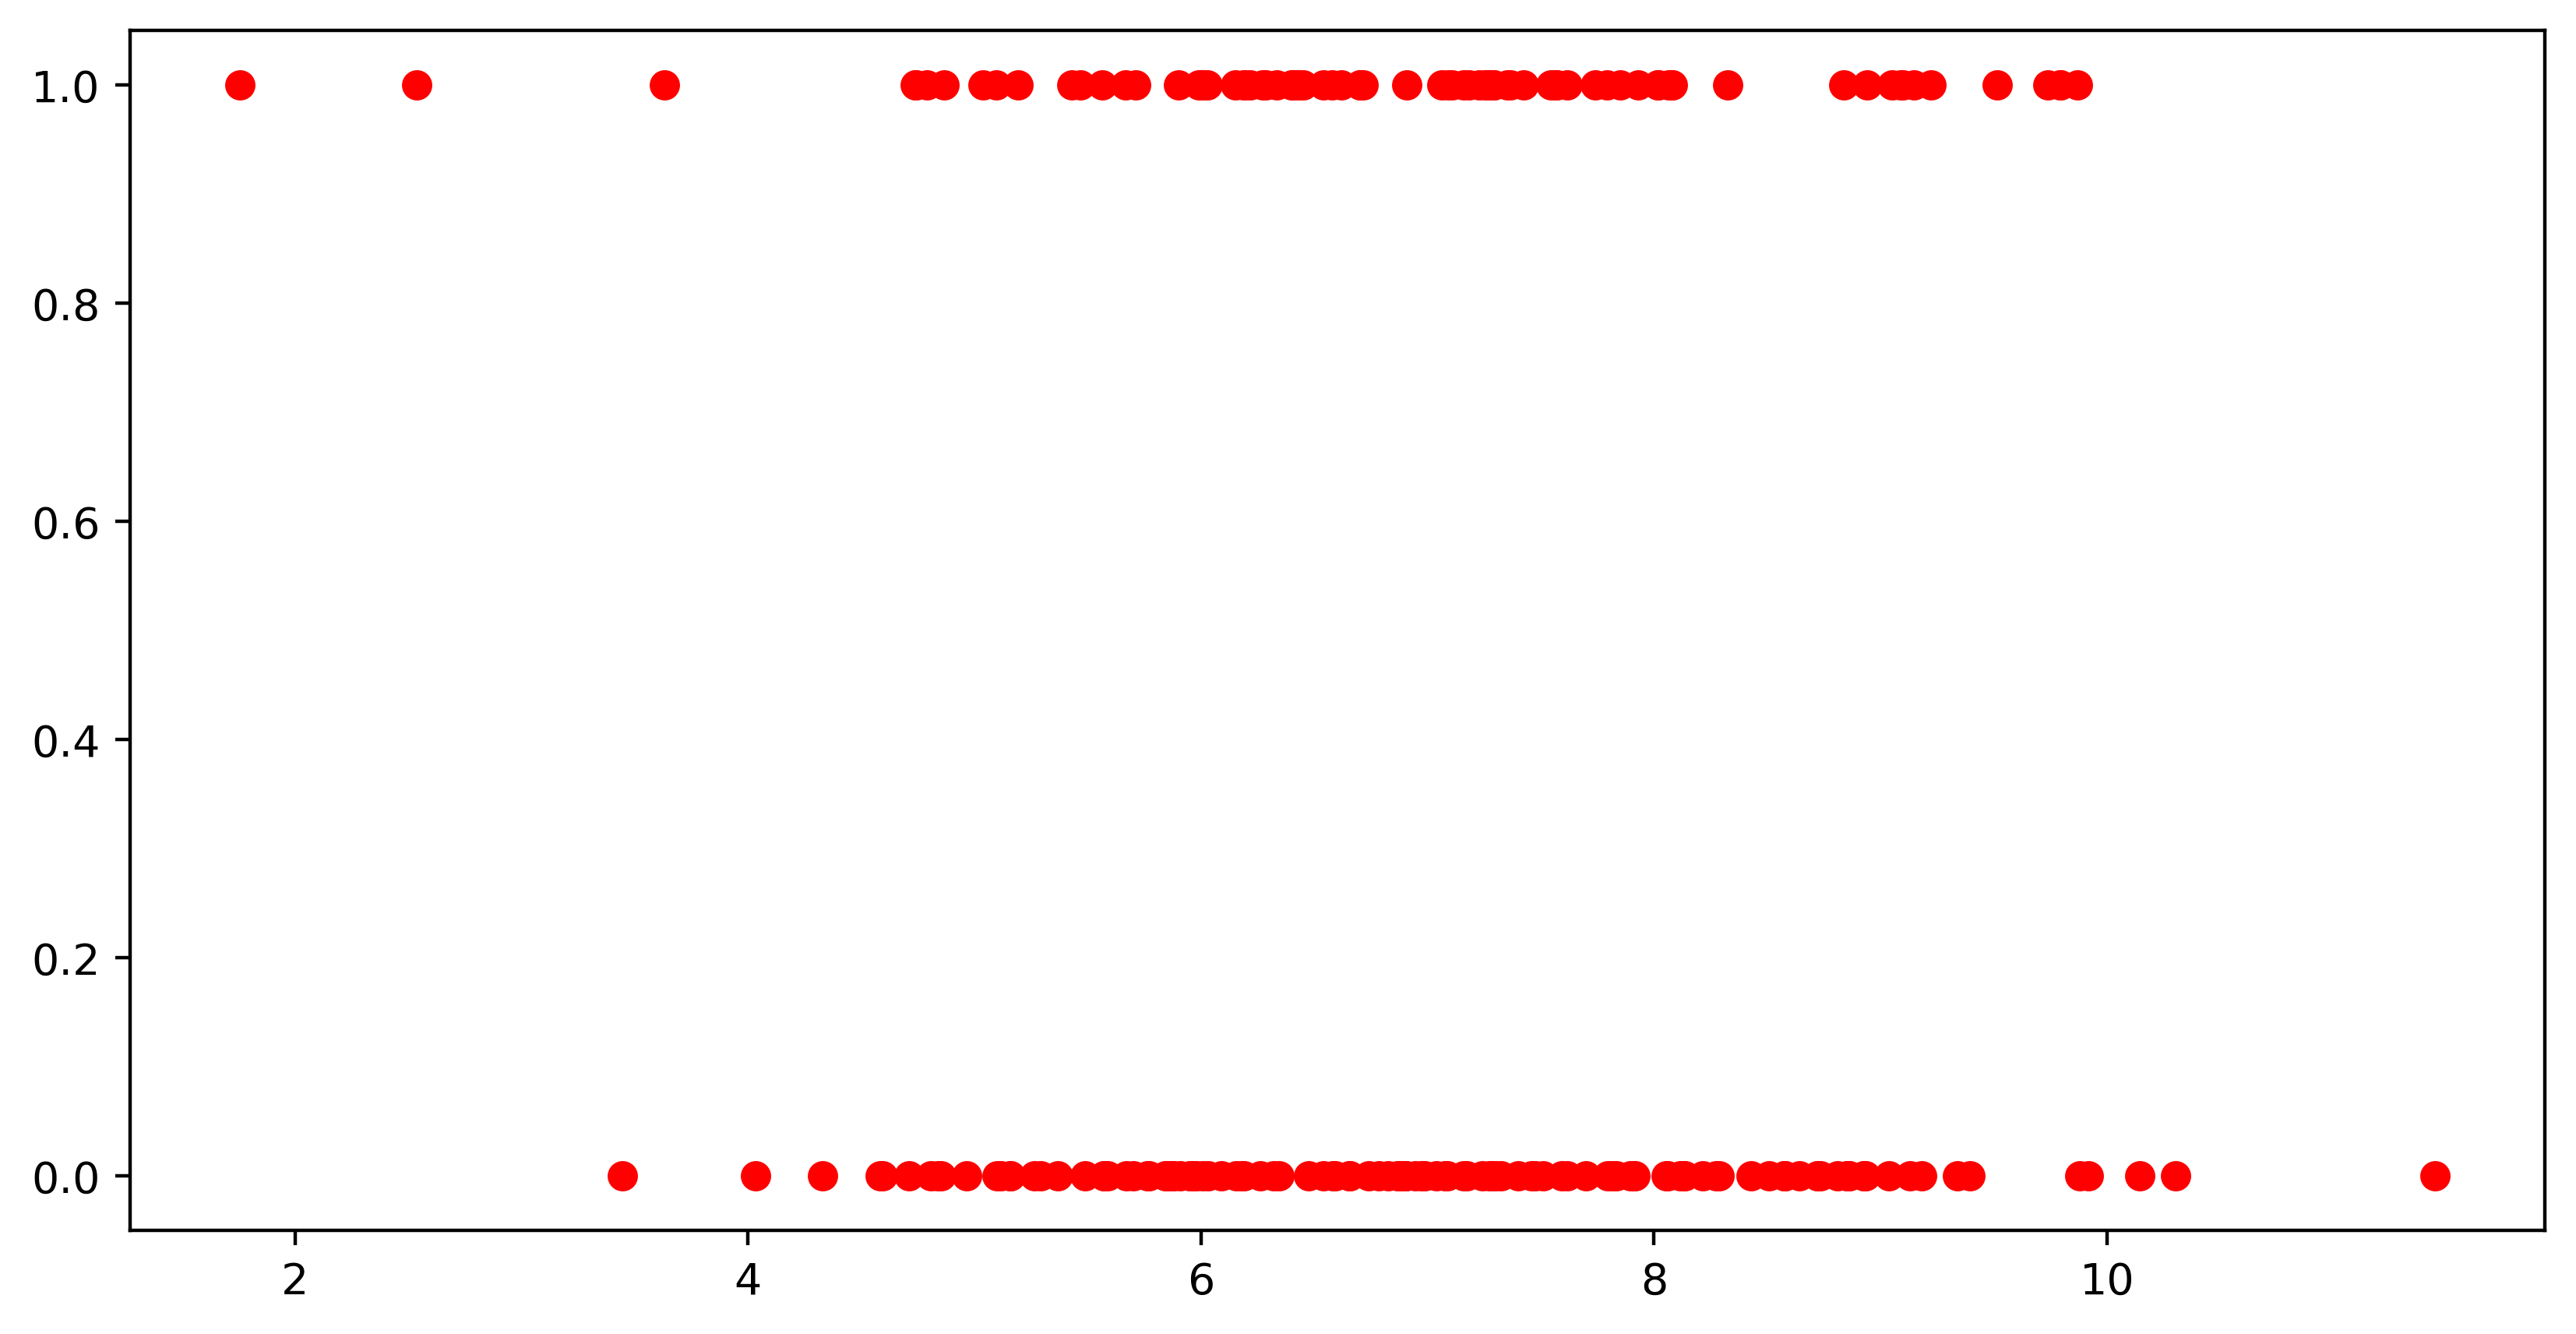

In [91]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(np.arange(1, 101), history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Value of Beta')
plt.show()

# plot how line changes across iterations
# (plot every 10 iterations with increasing boldness)
learn_rate = 0.05
curr_beta = -1

plt.figure(figsize=(10, 5), dpi=400)

for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, x, y)
    
    if iteration % 10 == 0:
        px = np.linspace(-1, 6, 100)
        py = curr_beta * px
        plt.plot(px, py, alpha=1 - (1 - iteration/100) * 0.95, color='blue')

plt.scatter(x, y, color='red')

plt.show()

# **6. Metrics and Evaluation**
------------

## **6.1 Example of Regression and Classification**
-----

In [92]:
# Simulación para regresión
y_reg_true = df['ph'] + np.random.normal(0, 5, len(df))  # Puedes ajustar según la columna que quieras predecir
y_reg_pred = df['ph'] + np.random.normal(0, 5, len(df))

# Simulación para clasificación
y_class_true = df['Potability']  # Puedes ajustar según la columna que quieras clasificar
y_class_pred = np.random.uniform(0, 1, len(df))

# Ahora y_reg_true, y_reg_pred, y_class_true, y_class_pred son tus datos simulados para regresión y clasificación

## **6.2 Mean Absolute Error (MAE)**
______

In [93]:
# Implementation in NumPy
def mean_absolute_error(y_true, y_pred):
    # Check if y_true and y_pred are the same shape
    assert y_pred.shape == y_true.shape
    return np.sum(np.abs(y_true - y_pred)) / len(y_pred)

In [94]:
print(f"Numpy Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Numpy Implementation of MAE: 5.630227073087629


In [95]:
# Implementation in Sklearn
from sklearn.metrics import mean_absolute_error

# Usage
print(f"Sklearn Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Sklearn Implementation of MAE: 5.630227073087629


## **6.3 Root Mean Squared Error (RMSE)**
---------

In [96]:
print(f"RMSE: {mean_squared_error(y_reg_true, y_reg_pred) ** (1/2)}")

RMSE: 7.120648256058753


## **6.4 Area Under Receiver Operating Characteristics Curve (AUC-ROC)**
-----------

In [97]:
def get_tpr_fpr(y_pred, y_true):
    tp = (y_pred == 1) & (y_true == 1)
    tn = (y_pred == 0) & (y_true == 0)
    fp = (y_pred == 1) & (y_true == 0)
    fn = (y_pred == 0) & (y_true == 1)

    tpr = tp.sum() / (tp.sum() + fn.sum())
    fpr = fp.sum() / (fp.sum() + tn.sum())

    return tpr, fpr

In [98]:
def roc_curve(y_pred, y_true, n_thresholds=15000):
    fpr_thresh = []
    tpr_thresh = []
    for i in range(n_thresholds + 1):
        
        threshold_vector = (y_pred >= i/n_thresholds)
        tpr, fpr = get_tpr_fpr(threshold_vector, y_true)
        fpr_thresh.append(fpr)
        tpr_thresh.append(tpr)
        
    return tpr_thresh, fpr_thresh

In [99]:
# Implementation in Numpy
def area_under_roc_curve(y_true, y_pred):
    fpr, tpr = roc_curve(y_pred, y_true)
    rectangle_roc = 0
    for k in range(len(fpr) - 1):
            rectangle_roc = rectangle_roc + (fpr[k]- fpr[k + 1]) * tpr[k]
    return 1 - rectangle_roc

In [100]:
from sklearn.metrics import roc_auc_score
print(f"Numpy Implementation of ROC-AUC: {area_under_roc_curve(y_class_true, y_class_pred)}")
print(f"Sklearn implementation of ROC-AUC: {roc_auc_score(y_class_true, y_class_pred)}")

Numpy Implementation of ROC-AUC: 0.4829983559391706
Sklearn implementation of ROC-AUC: 0.4830291820797369


## **6.5 Precision and Recall**
----------

In [101]:
# Convert probability values into integers
y_class_pred = np.rint(y_class_pred)

In [102]:
# Precision
# number of correctly classified positive values/number of all predicted positive values
def precision(y_true, y_pred):
    assert y_true.shape == y_pred.shape    
    return ((y_pred == 1) & (y_true == 1)).sum() / y_pred.sum()
print(f"Numpy Precision: {precision(y_class_true, y_class_pred)}")

Numpy Precision: 0.38813229571984437


In [103]:
# Recall
# number of correctly classified positive values/number of all true positive values
def recall(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return ((y_pred == 1) & (y_true == 1)).sum() / y_true.sum()
print(f"Numpy Recall: {recall(y_class_true, y_class_pred)}")

Numpy Recall: 0.4919852034525277


In [104]:
from sklearn.metrics import recall_score, precision_score
print(f"Sklearn Precision {precision_score(y_class_true, y_class_pred)}")
print(f"Sklearn Recall: {recall_score(y_class_true, y_class_pred)}")

Sklearn Precision 0.38813229571984437
Sklearn Recall: 0.4919852034525277


## **6.6 Accuracy**
-------

In [105]:
def accuracy(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    # returns a boolean array(of 1s and 0s) indicating if element of both arrays match
    return np.average(y_true == y_pred)

from sklearn.metrics import accuracy_score

print(f"Numpy Accuracy: {accuracy(y_class_true, y_class_pred)}")
print(f"Sklearn Accuracy: {accuracy_score(y_class_true, y_class_pred)}")

Numpy Accuracy: 0.48234709099950274
Sklearn Accuracy: 0.48234709099950274


## **6.7 F1 Score**
-----------

In [106]:
# F1 Score
# Harmonic Mean of Precision and Recall

def f1_score(y_true, y_pred):
    return (2*precision(y_true, y_pred)*recall(y_true, y_pred)) / (precision(y_true, y_pred)+recall(y_true, y_pred))

print(f"Numpy Implementation of F1 Score: {f1_score(y_class_true, y_class_pred)}")
    
from sklearn.metrics import f1_score

print(f"Sklearn Implementation of F1 Socre: {f1_score(y_class_true, y_class_pred)}")

Numpy Implementation of F1 Score: 0.43393148450244695
Sklearn Implementation of F1 Socre: 0.43393148450244695


# **7. Algorithms**
----

## **7.1 K-Nearest Neighbors (KNN)**
______